<a href="https://colab.research.google.com/github/1991Ab/Capstone-project-2-Taxi-trip-time-Prediction/blob/main/Taxi_trip_time_Prediction_individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NYC Taxi Trip Time Prediction**


##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary**

The objective of this project is to to train various supervised learning algorithms to predict  the total ride duration of taxi trips in New York City.
I first investigated the datasets by using exploratory data analysis and visualization techniques.Further , I have also done few hypothesis testing on data.
This is followed by various Feature preprocessing techniques and outlier removal by using boxplots and IQR formula and then featutre normalization and scaling.These steps are done in order to make it easy for the model to 
learn from the data.Feature preprocessing is one of the most important steps in developing a machine learning model. 
It consists of the creation of features as well as the cleaning of the data. Sometimes, the creation of features 
is also referred as "feature engineering".At last the data is split into train data and test data for modelling.
	
  
  For modelling the data , I started with Linear Regression followed by Ridge and Lasso Regression.Next I used Randpm Forest and XGBoost algorithms
for modelling the data.Further , after implementing these algorithms , I came to conclusion that Linear Regresion algorithm gives very good results for the 
given data

# **GitHub Link**

https://github.com/1991Ab/Capstone-project-2-Taxi-trip-time-Prediction

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge ,RidgeCV
from sklearn.linear_model import Lasso ,LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 463.4 kB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 29.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-linux_x86_64.whl size=552500 sha256=4a9817b868ec328fcb03ad115d4ff28f3843f1cfd582f59f428e3c6058ad84cc
  Stored in directory: /root/.cache/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap


### Dataset Loading

In [2]:
# Load Dataset
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Importing the dataset
file_path = "/content/drive/MyDrive/Capstone project-2/NYC Taxi Data (1).csv"
df = pd.read_csv(file_path)


### Dataset First View

In [4]:
# Dataset First 
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns 
df.shape

(1458644, 11)

We can see that the NYC taxi trip time prediction data set contains 1458644 rows and 11 columns

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Here we see the details of each column present in the dataset such as  their data type and count of values 

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

It is very essential to check if our data set has any duplicate values and remove them if any.We can find out the duplicate values using the function dataset.duplicated().  len(dataset[dataset.duplicated()]) gives the count of duplicate values.From the above code we can see that there are no duplicate values in the dataset.

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


<Axes: >

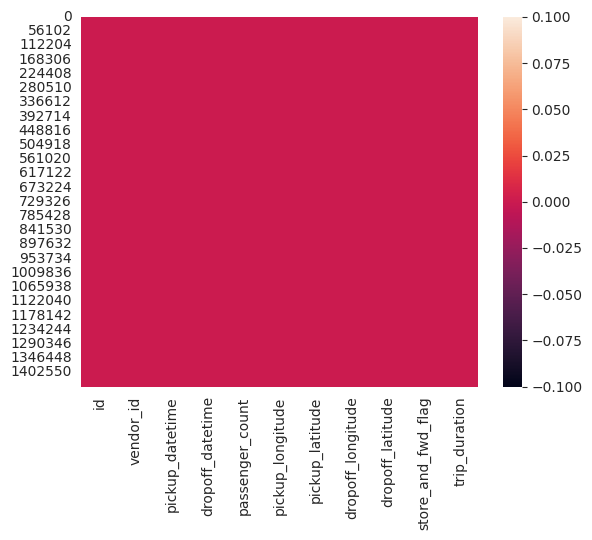

In [10]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=True)

It is very important to check for missing values or NAN values as it has a very high impact on the model.Hence identifying the NAN values and treating them becomes very important.From the above data and graph we can see that the dataset has no missing or NAN values.

### What did you know about your dataset?

The dataset given is based on the  NYC Yellow Cab trip record data.We have to predict the taxi trip duration of various rides using various Machine Learning models.The data set has 'trip_duration' as a continous target variable and many independent variables like 'passenger_count' , 'pickup_datetime' , 'dropoff_datetime' etc.The  dataset has 1458644 rows and 11 columns.It has no NAN values and duplicate values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


### Variables Description 

The following are the variables used in dataset

* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")
#df.nunique()

No. of unique values in  id is 1458644 .
No. of unique values in  vendor_id is 2 .
No. of unique values in  pickup_datetime is 1380222 .
No. of unique values in  dropoff_datetime is 1380377 .
No. of unique values in  passenger_count is 10 .
No. of unique values in  pickup_longitude is 23047 .
No. of unique values in  pickup_latitude is 45245 .
No. of unique values in  dropoff_longitude is 33821 .
No. of unique values in  dropoff_latitude is 62519 .
No. of unique values in  store_and_fwd_flag is 2 .
No. of unique values in  trip_duration is 7417 .


## 3. ***Data Wrangling***

### Data Wrangling Code

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
new_data=df.copy()
# Checking Shape of True Value
new_data.shape


(1458644, 11)

In [15]:
#calculating the distance between pickup and dropoff locations using haversine formula

In [16]:
!pip  install haversine
from numpy import math
from haversine import haversine
def trip_distance(df) :
  trip_pickup=(df['pickup_latitude'], df['pickup_longitude'])
  trip_dropoff=(df['dropoff_latitude'], df['dropoff_longitude'])
  return haversine(trip_pickup , trip_dropoff)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
#calculating the distance and creating a new column "distance" in the dataset
df['distance']=df.apply(lambda x:trip_distance(x) , axis=1)

In [18]:
df['distance'].reset_index


<bound method Series.reset_index of 0          1.498523
1          1.805510
2          6.385107
3          1.485500
4          1.188590
             ...   
1458639    1.225082
1458640    6.049844
1458641    7.824617
1458642    1.092565
1458643    1.134044
Name: distance, Length: 1458644, dtype: float64>

In [19]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590


**Calculating the customer with highest trip distance**


In [20]:
max_distance=df.groupby('id')['distance'].max().reset_index().sort_values(by='distance' , ascending=False)

In [21]:
max_distance

,id,distance
841964,id2306955,1240.910391
551454,id1510552,891.215334
418714,id1146400,578.843617
965050,id2644780,574.876237
365565,id1001696,562.235965
...,...,...
45393,id0124833,0.000000
836696,id2292555,0.000000
1354540,id3715212,0.000000
435164,id1191323,0.000000


<Axes: xlabel='id', ylabel='distance'>

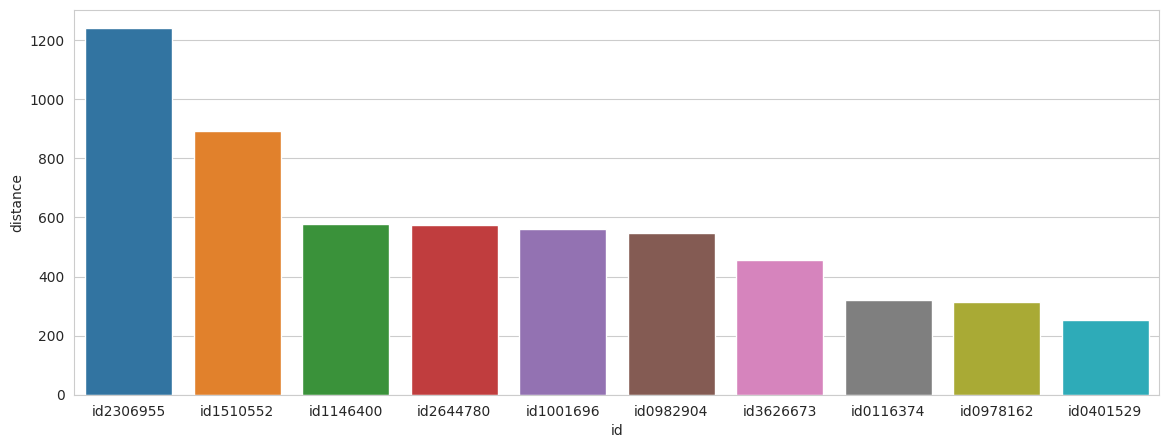

In [22]:
#Graphical Representation
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,5)
sns.barplot(x='id' , y='distance' ,  data=max_distance.head(10))

We can see from the above plot that customer id'id2306955' has the highest distance for trip 

Now let us create four new features from 'pickup_datetime' and 'dropoff_datetime' for better analysis.

In [23]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
distance              float64
dtype: object

In [24]:
#Changing the data type of variables 'pickup_datetime' and 'dropoff_datetime' to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [25]:
df["year"] = df["pickup_datetime"].apply(lambda x: x.year)
df["pickup_month"] = df["pickup_datetime"].apply(lambda x: x.month)
df["dropoff_month"] = df["dropoff_datetime"].apply(lambda x: x.month)
df["pickup_day"] = df["pickup_datetime"].apply(lambda x: x.weekday())
df["dropoff_day"] = df["dropoff_datetime"].apply(lambda x: x.weekday())
df["dropoff_time_hour"] = df["dropoff_datetime"].apply(lambda x: x.hour)
df["dropoff_time_min"] = df["dropoff_datetime"].apply(lambda x: x.minute)
df["pick_up_time_hour"] = df["pickup_datetime"].apply(lambda x: x.hour)
df["pick_up_time_min"] = df["pickup_datetime"].apply(lambda x: x.minute)
df.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance,year,pickup_month,dropoff_month,pickup_day,dropoff_day,dropoff_time_hour,dropoff_time_min,pick_up_time_hour,pick_up_time_min
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.498523,2016,3,3,0,0,17,32,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1.805510,2016,6,6,6,6,0,54,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,6.385107,2016,1,1,1,1,12,10,11,35


**Now,let us analyse the trip duration for a  week**

In [26]:
duration=df.groupby("pickup_day")['trip_duration'].mean().reset_index().sort_values(by='trip_duration' , ascending=False)
duration

,pickup_day,trip_duration
3,3,1006.528654
4,4,990.224200
1,1,983.463124
2,2,975.450494
5,5,948.051175
6,6,901.639395
0,0,897.947839


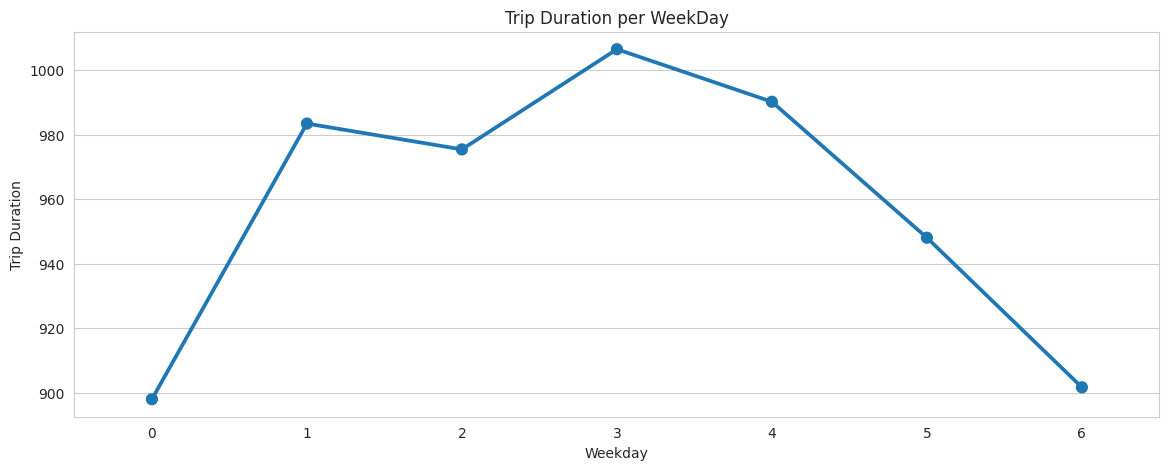

In [27]:
#Graphical Representation
sns.pointplot(x='pickup_day' , y='trip_duration' , data=duration)
plt.ylabel('Trip Duration')
plt.xlabel('Weekday')
plt.title('Trip Duration per WeekDay')
plt.show()

From the above plot we can infer that the duration of trip is maximum on Thursday represented as day-'3'.

**Now let us see the customer who have highest trip duration**

In [28]:
customer_distance=df.groupby("id")["trip_duration"].mean().reset_index().sort_values(by="trip_duration" , ascending=False)
customer_distance



,id,trip_duration
19503,id0053347,3526282.0
484252,id1325766,2227612.0
134656,id0369307,2049578.0
680749,id1864733,1939736.0
709107,id1942836,86392.0
...,...,...
951864,id2608913,1.0
456530,id1250016,1.0
544652,id1491861,1.0
306594,id0839864,1.0


From above code we can see that the customer with id 'id0053347' has the highest trip duration , followed by customer with id 'id1325766' and 'id0369307'.The customer id 'id2836747' has the lowest trip duration

**Now,we will analyse all the vedor's trip duration and distance travelled for each month**

In [29]:
vendor_info=df.groupby(["vendor_id" , "pickup_month"] , as_index=False).agg({"trip_duration" : "mean" , "distance" : "mean"}).reset_index()
vendor_info

,index,vendor_id,pickup_month,trip_duration,distance
0,0,1,1,823.093938,3.323979
1,1,1,2,838.171500,3.311516
2,2,1,3,812.760742,3.402242
3,3,1,4,841.515394,3.401635
4,4,1,5,875.349014,3.508057
5,5,1,6,882.126578,3.465044
6,6,2,1,1006.850989,3.422708
7,7,2,2,991.951097,3.340192
8,8,2,3,1045.132723,3.455311
9,9,2,4,1069.563930,3.463783


In [30]:
#Finding out the vendor with highest trip duration
vendor_info.sort_values("trip_duration" , ascending=False).head(3)

,index,vendor_id,pickup_month,trip_duration,distance
11,11,2,6,1129.249938,3.567839
10,10,2,5,1108.337217,3.589291
9,9,2,4,1069.563930,3.463783


From the above analysis we that it is 'Vendor 2' covering a highest duration of an average 1129.24 seconds and it is in the month of June represented by'6'.The second  and the third place is also occupied by 'Vendor 2'.The second highest trip covered was in the month of May represented by 5 and the third highest trip was covered in the month of 'April' represented by 4 in the above analysis.

**Now we will find out the number of customers who travel within 30 mins,customers who travel between 30 mins to 1hr and customers who travel from 1hr to 2hr and customers who travel above 2hrs and more.**

In [31]:
#Dividing the dataset on the basis of cutomer travelling time.
#Determining the count of customers who travel within 30 mins
df_travel_time_30=df[df["trip_duration"]<=1800]
df_travel_time_30.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance,year,pickup_month,dropoff_month,pickup_day,dropoff_day,dropoff_time_hour,dropoff_time_min,pick_up_time_hour,pick_up_time_min
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.498523,2016,3,3,0,0,17,32,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1.805510,2016,6,6,6,6,0,54,0,43
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1.485500,2016,4,4,2,2,19,39,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1.188590,2016,3,3,5,5,13,38,13,30
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,...,1.098944,2016,1,1,5,5,22,9,22,1


In [32]:
print(len(df_travel_time_30))

1345526


We can see from the above data that the count of customer travelling within 30 mins is really very large which is around 1345526

In [33]:
#Determinig the count of customers who travel from 30 mins to 1hour.
df_travel_time_60=df[(df["trip_duration"]<=3600)& (df["trip_duration"]>1800)]
df_travel_time_60.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance,year,pickup_month,dropoff_month,pickup_day,dropoff_day,dropoff_time_hour,dropoff_time_min,pick_up_time_hour,pick_up_time_min
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,6.385107,2016,1,1,1,1,12,10,11,35
16,id3379579,2,2016-04-11 17:29:50,2016-04-11 18:08:26,1,-73.991165,40.755562,-73.999290,40.725353,N,...,3.428091,2016,4,4,0,0,18,8,17,29
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,...,20.602603,2016,6,6,4,4,8,56,8,15
29,id1410897,1,2016-03-23 14:10:39,2016-03-23 14:49:30,1,-73.982117,40.756351,-73.865692,40.770988,N,...,9.939457,2016,3,3,2,2,14,49,14,10
33,id0023813,1,2016-04-17 14:38:30,2016-04-17 15:16:19,1,-73.990311,40.756580,-73.870918,40.773930,N,...,10.238399,2016,4,4,6,6,15,16,14,38


In [34]:
print(len(df_travel_time_60))

100801


From the above analysis we can see that the number of customers who travel between 30 mins to 1 hour is 100801.It is pretty less compared to number of customer who travel within 30 mins. 

In [35]:
#Determiming the count of customers who travel between 1 hours to 2 hours.
df_travel_time_2hr=df[(df["trip_duration"]>3600) & (df["trip_duration"]<=(3600*2))]
df_travel_time_2hr.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance,year,pickup_month,dropoff_month,pickup_day,dropoff_day,dropoff_time_hour,dropoff_time_min,pick_up_time_hour,pick_up_time_min
354,id3402983,2,2016-06-30 15:48:06,2016-06-30 17:31:13,1,-73.781898,40.644772,-73.985893,40.760159,N,...,21.455362,2016,6,6,3,3,17,31,15,48
403,id2693863,1,2016-03-18 08:22:10,2016-03-18 09:47:19,1,-73.777184,40.646500,-73.985001,40.760918,N,...,21.650717,2016,3,3,4,4,9,47,8,22
861,id2029339,2,2016-01-22 14:13:46,2016-01-22 15:15:21,1,-73.873360,40.774109,-73.958115,40.775558,N,...,7.138697,2016,1,1,4,4,15,15,14,13
1057,id0631822,2,2016-05-17 14:17:48,2016-05-17 15:26:06,1,-73.995583,40.716949,-73.789101,40.642448,N,...,19.282143,2016,5,5,1,1,15,26,14,17
1113,id3893063,2,2016-06-02 17:32:41,2016-06-02 18:42:43,1,-73.948578,40.778080,-73.781792,40.646790,N,...,20.266766,2016,6,6,3,3,18,42,17,32


In [36]:
print(len(df_travel_time_2hr))

10064


We can see that the number of customers who travel between 1 hour to 2hour is 10064.

In [37]:
#Determiming the count of customers who travel for more than 2 hours.
df_travel_time=df[df["trip_duration"]>(3600*2)]
df_travel_time.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance,year,pickup_month,dropoff_month,pickup_day,dropoff_day,dropoff_time_hour,dropoff_time_min,pick_up_time_hour,pick_up_time_min
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,...,2.992821,2016,2,2,5,6,3,33,4,3
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,...,1.176095,2016,5,5,5,6,18,32,18,36
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,...,4.366110,2016,6,6,1,2,12,58,12,58
3092,id0296060,2,2016-06-16 08:07:39,2016-06-16 10:11:39,2,-73.779083,40.647491,-74.006996,40.708523,N,...,20.382520,2016,6,6,3,3,10,11,8,7
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,...,1.859418,2016,2,2,5,6,0,19,0,21


In [38]:
print(len(df_travel_time))

2253


From the above analysis we can see that the number of customers having travel time of above 2 hours is 2253 which is pretty less compared to the number of customers travelling within 30 mins.

According to a perception we will get a clear view of customers and their tavel 
duration by graphical representaions.However for analysing the customers trip duration it is necessary to deep dive into the data set to unearth many insights.So I have created a new column called "Distance" using the haversine formula.I have analysed the customers with highest  distance and highest trip_duration.
I have broken down the "pickup_datetime" column,"droppoff_datetime" column into 8 columns which are:-
"pickup_month" , "pick_up_time_hr" , "pick_up_time_min" , "pick_up_day",
"dropoff_month" , "dropoff_time_hr" , "dropoff_time_min" , "dropoff_day"
Following are the insights that were analysed:

*   The maximum cabs were booked on "Friday" represented as day-4

*   The highest duration of trip was on "Thursday" reprsented as day-3

*   The highest duration was done by cutomers whose booking id was 'id0053347'.
    It is found out that the trip duration for this trip is 979.52 hours.

*   The highest distance was travelled by the customers whose booking id is
    found to be 'id2306955'.The distance travelled is approximately  1240.91

*   We can see from the  data analysis that the count of customer      
    travelling within 30 mins is really very large which is around '1345526'   

*   From the above analysis it is inferred that the number of customers who 
    travelbetween 30 mins to 1 hour is 100801.It is pretty less compared to   
    number of customer who travel within 30 mins.

*   We can see that the number of customers who travel between 1 hour to 2hour 
    is 10064.It has become less when compared to the number of customer 
    travelling within 30 mins and number of customer travelling between 30 mins
    to 1 hour

*   From the above analysis we can see that the number of customers having  
    travel time of above 2 hours is 2253 which is very less compared to the  
    number of customers travelling within 2hrs.















## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Horizontal Bar plot on Dependant Variable i.e., Trip Duration (Univariate)

In [39]:
# Chart - 1 visualization code
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,5)

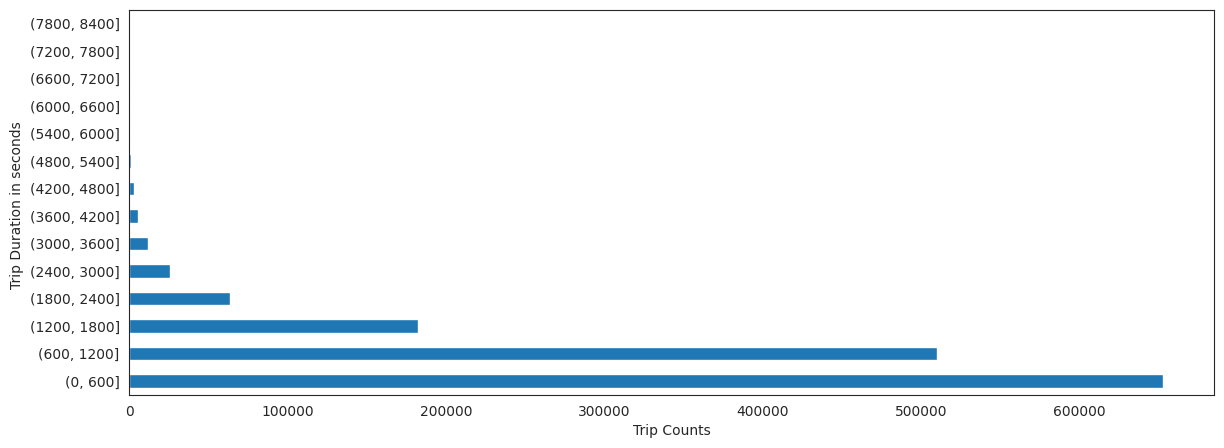

In [40]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(0,9000,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration in seconds ')
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph is used to compare data among categories.It also shows the  counts of values for the different levels of a categorical or nominal variable.To visualize the number of trip counts for various set of trip durations,I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the above plot I got to know that the amount of customers who travel between 0-600 seconds is very large.A lot of people prefer to do short trips in taxi cab wherein the duration is within 10mins.Very few people are booking cabs for longer trips.The number of trips is decresing with the increase in trip duration.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As a taxi cab owner It will be important to analyse the trips that are being booked.Wheather they are  longer trips where the trip duration is more tha an a hour or shorter trips where in the trip ends within 10 mins.This analysis can help to decide the fare of each trip and where to concentrate more number of cabs.

#### Chart - 2 - Countplot for Vendor_Id(Univariate)

Text(0.5, 1.0, 'Market Share Of Vendor Id')

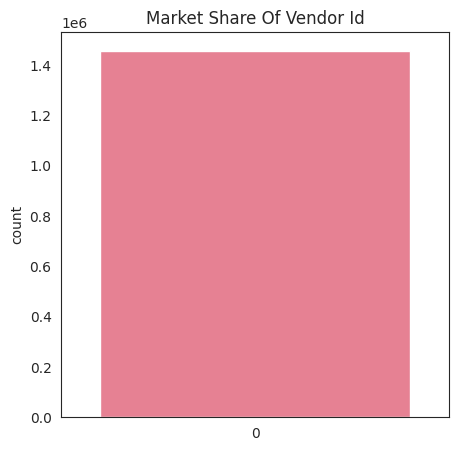

In [41]:
# Chart - 2 visualization code
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (5,5)
sns.countplot(df["vendor_id"], palette="husl").set_title("Market Share Of Vendor Id")

##### 1. Why did you pick the specific chart?

Countplot Shows the counts of observations in each categorical bin using bars.I used count plot to visualise the categorical feature 'vendor_id' to analyse which vendor has more market share

##### 2. What is/are the insight(s) found from the chart?

From the above plot I got to know that there are two vendors who are providing cab services which are 'Vendor_id1' and 'Vendor_id2'.From the countplot it is evident that  'Vendor_id2' has more number of customers than Vendor_id1'



```
`[# This is formatted as code](https:// [link text](https://))`
```

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,as a cab owner it becomes important to analyse which all are vendors who are making a high profit and are more popular among the pepole.It will also be crucial to get to know the factors that are leading to more popularity among the people which inturn leads to a high market share  

#### Chart - 3 - Pie chart on "Store_Forward" flag(Univariate)

<Axes: ylabel='store_and_fwd_flag'>

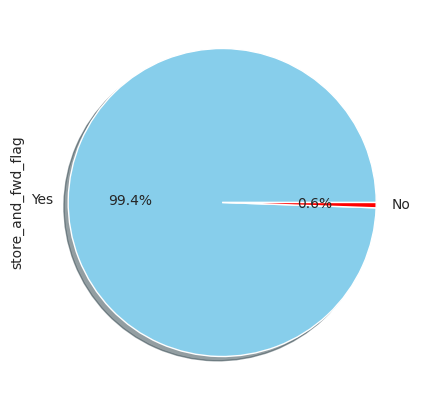

In [42]:
# Chart - 3 visualization code
df["store_and_fwd_flag"].value_counts().plot(kind="pie" , labels=['Yes' , 'No'] , autopct="%1.1f%%" , shadow=True , colors=['skyblue' , 'red'] , explode=[0,0])

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data.Each slice represents one component and all slices added together equal the whole.It becomes easy to visualize data with pie charts and each slice can be analysed easily.I used pie chart to anlyse "store_and_forward"  flag.


##### 2. What is/are the insight(s) found from the chart?

From the above pie chart I came to know that around 99.4% of cabs record the trip record data before sending it to the vendor.Only around 0.6% of cabs have not recorded the cab data before sending it to the vendor.The trip might not hav been recorded due to either poor infrastructure provided by the vendors or due to signal loss that might have happend during  recording of the trip.However analysis shows that all most all cabs prefer to store the recoeded trip.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above analysis indicates how many of the cabs stotre the trip record before sending it to the vendor.Definetly its helps in creating a positive impact on business.For the taxi companies the trip record data is a very important and crucial data which has to be stored carefully.Storing these types of data help companies to understand the customer needs and can provide better customer satisfaction.Storing the trip record data in vehicle memomry before sending to the vendor means we are duplicating the data.If some mishap happens in the vendor's server end the data will not be destroyed.It can be easily retrived by the vehicle's memory.It sets as an example for good infrastructure and technology provided.Also It helps in providing good customer satisfaction.

#### Chart - 4 - Taxi pick up time vs Passenger count(Bivariate)

> 



In [43]:
passenger_number=df.groupby("pick_up_time_hour")["passenger_count"].count().reset_index().sort_values(by="passenger_count" , ascending=False)
passenger_number

,pick_up_time_hour,passenger_count
18,18,90600
19,19,90308
21,21,84185
20,20,84072
22,22,80492
17,17,76483
14,14,74292
12,12,71873
15,15,71811
13,13,71473


<Axes: xlabel='pick_up_time_hour', ylabel='passenger_count'>

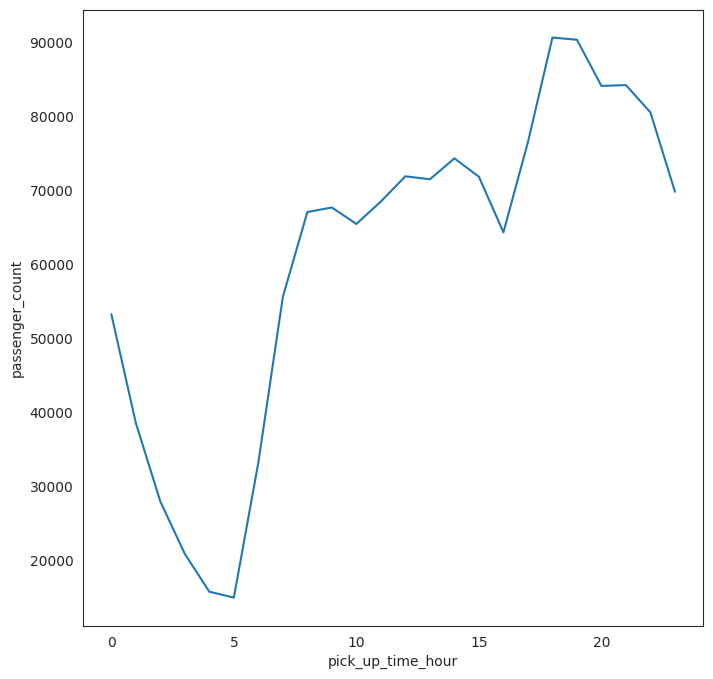

In [44]:
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (8,8)
sns.lineplot(data=passenger_number, x="pick_up_time_hour", y="passenger_count")


##### 1. Why did you pick the specific chart?

A line chart is used to visualize the change in one variable with the change in time or any other continous variable.I used Line plot to track and visualize the change in the number of passengers onbaording cabs with time.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I came to know that the number of people travelling is maximum at 6:00 PM in the evening.From early morning 1:00 AM till 5 AM the number of people travelling is very minimal.The number of people travelling increases linearly from 5 AM untill 10 AM.After 10 AM till 3 PM there is a very few increase in the number of passengers.It dips at 4.00PM however reaches its peak at 6.00 pm.After 6.00 PM in the evening the number of passengers travelling decreases significantly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,definetly the above analysis will have a positive impact on the business.
As a company running taxi cabs , it becomes very important to analyse at what time most of the people travel so that they can pool in maximum number of cabs at that particular time.At peak hours which from analysis we got to know as 6 PM in the evening and morning 8-10AM the company can come out with some attractive offers and prices to attract maximum number of customers.Also they can come up with car-pooling option to obtain more number of bookings at a given point of time.

#### Chart - 5 - Taxi Trip duration vs Distance(Bivariate)

<Axes: xlabel='trip_duration', ylabel='distance'>

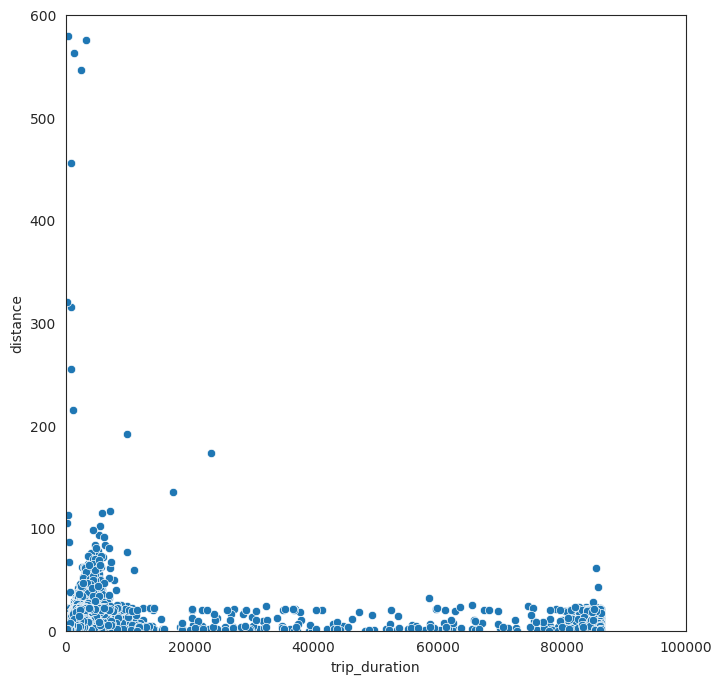

In [45]:
# Chart - 5 visualization code
# Visualizing Percentage of customers taken international plan
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (8,8)
plt.xlim(0,100000)
plt.ylim(0,600)
sns.scatterplot(x="trip_duration", y="distance", data=df)

##### 1. Why did you pick the specific chart?

A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables in a data set.
I used scatter plot to check how the 'distance' variable is related to the 'trip_duration' variable.

##### 2. What is/are the insight(s) found from the chart?

From the above plot I came to know that 'distance' column and 'trip_duration' are not linearly realted.There were lot of trips whose distance was very minimal nearing to '0' but the time taken to cover them was ranging from 20,000 to 80,000 seconds.Also we can see that in few of the trips very large distance like 600kms were covered in very short period of time which is very unlikley.There are many trips with distance as '0' but have clocked time.This is very unlikely to happen and can be removed. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the analysis found will definetly have a positive impact on the business.
As a cab owner it will be very important to analyse these data of the trip such as what is time taken to cover a particular  distance .It helps to analyse if there is any delay in reaching the destination and the reasons behind it.The reasons can be traffic,bad roads ,bad wheather or even bad driving.

#### Chart - 6 -Month of booking vs number of booking.(Bivariate)

In [46]:
# Chart - 6  visualization code
# vizualizing code for the months having more number of bookings.
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (8,8)
group1=df.groupby("pickup_month")["id"].count().reset_index().sort_values(by="id" , ascending=False).rename(columns={'id':'Number of Bookings'})
group1

,pickup_month,Number of Bookings
2,3,256189
3,4,251645
4,5,248487
1,2,238300
5,6,234316
0,1,229707


[Text(0.5, 1.0, 'Number of bookings for each month')]

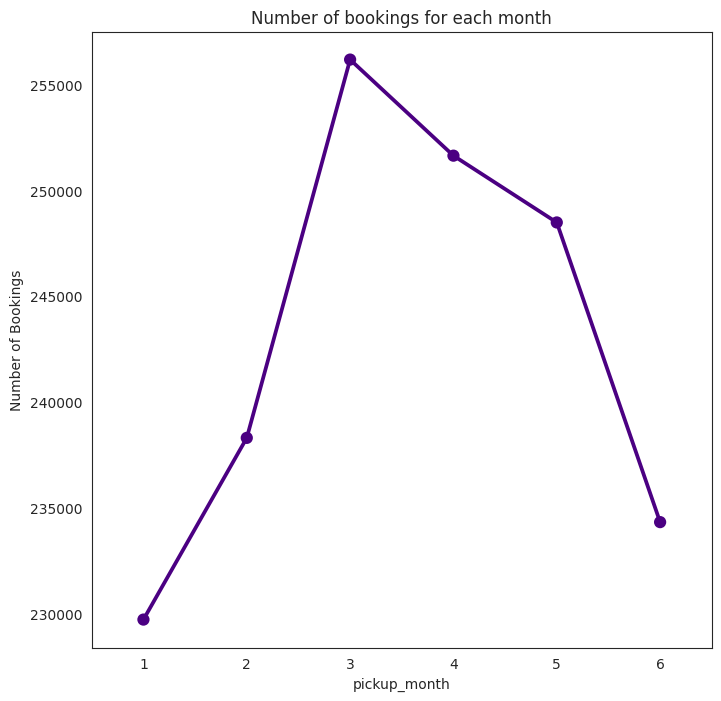

In [47]:
sns.pointplot(x="pickup_month" , y="Number of Bookings" , data=group1 , color="indigo").set(title="Number of bookings for each month")

##### 1. Why did you pick the specific chart?

Points plots are very usefull in focusing  and explaining on the different levels of comparison of two variables.I used point plot to analyse how the bookings are done during various months of a year. 

##### 2. What is/are the insight(s) found from the chart?

From the above plot I could visualize that the maximum number of cab bookings were done in the months of 'March' , 'April' and May.
Comparitively less bookings are done in the months of 'January' and 'June'.This can be due to weather conditions.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,this analysis will definetly have a positive impact on the business.
The taxi owners and vendors can use this data to come up with more number vehicles during these periods.Also during the months where cab bookings are less the companies can come up with attractive fares and special offers to improve their business.

#### Chart - 7- Determining the relationship between 'Trip_duration' and other variables.

In [48]:
# Chart - 7 visualization code
col=df.describe().columns
col

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance',
       'year', 'pickup_month', 'dropoff_month', 'pickup_day', 'dropoff_day',
       'dropoff_time_hour', 'dropoff_time_min', 'pick_up_time_hour',
       'pick_up_time_min'],
      dtype='object')

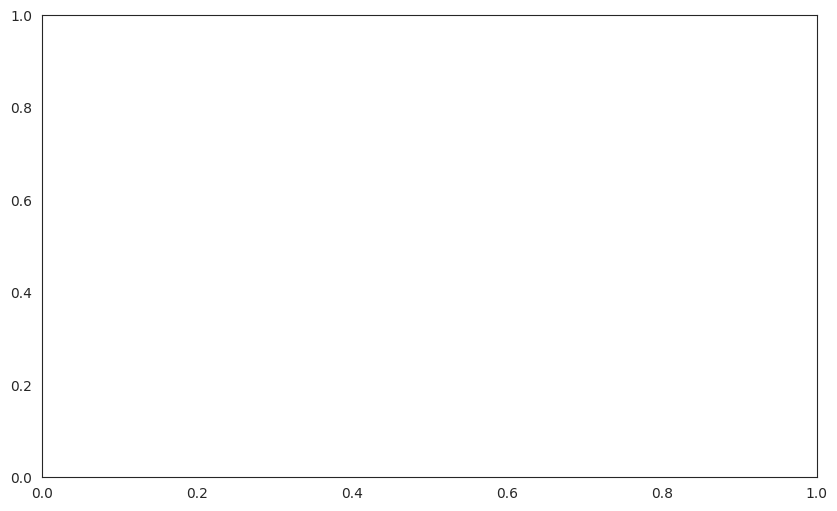

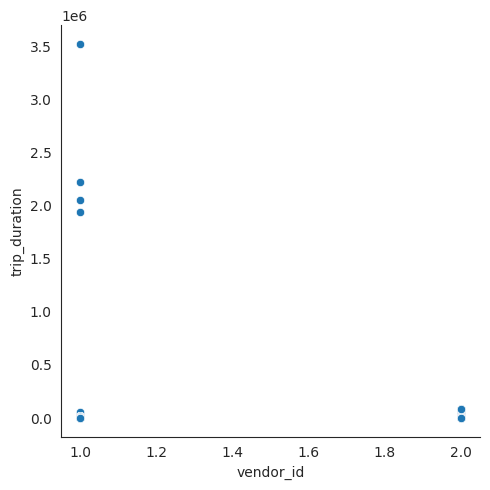

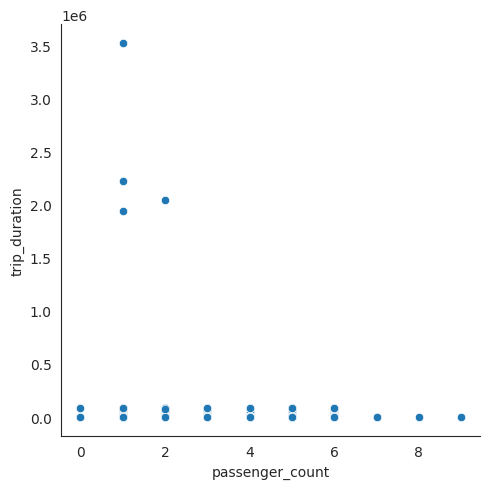

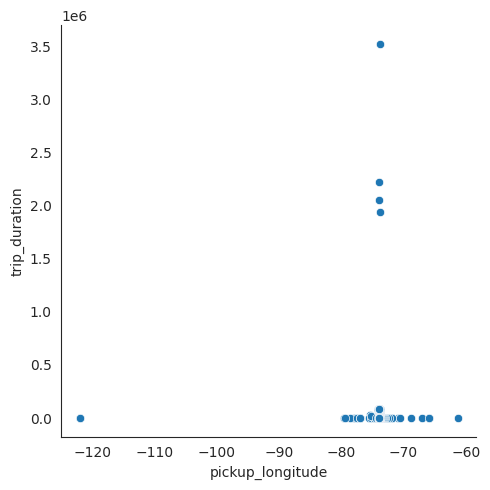

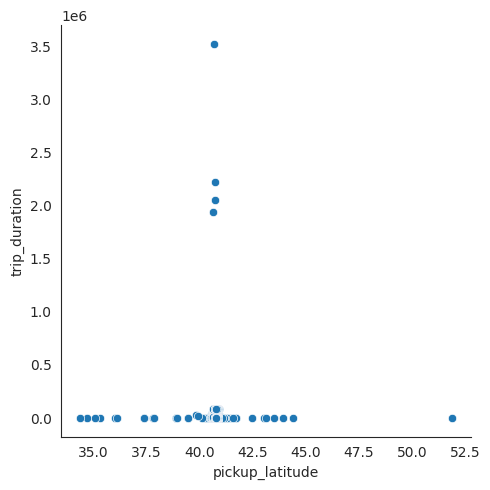

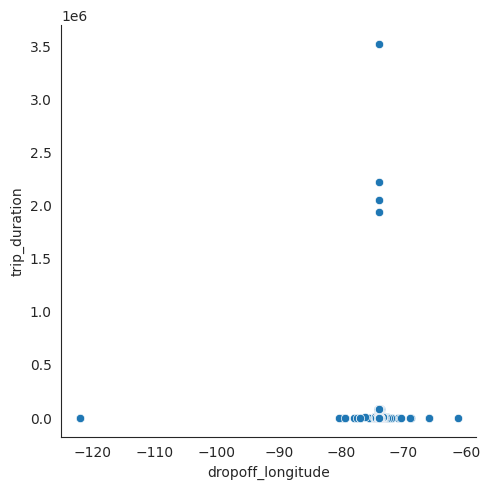

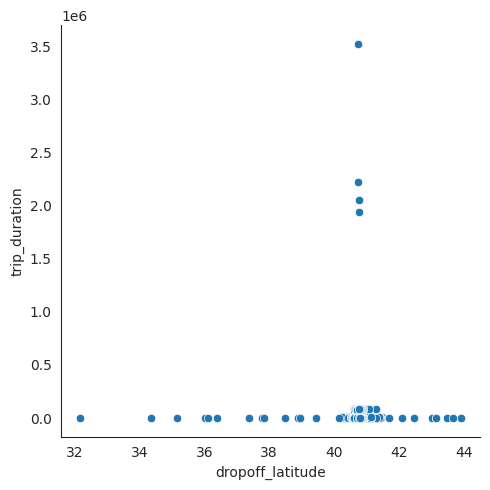

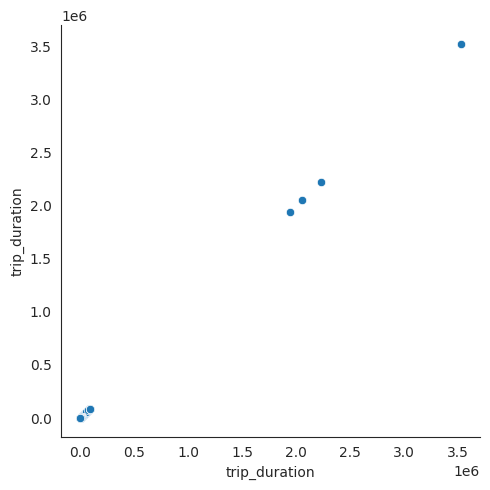

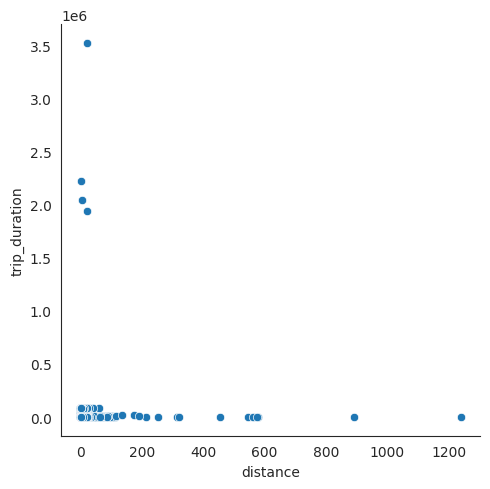

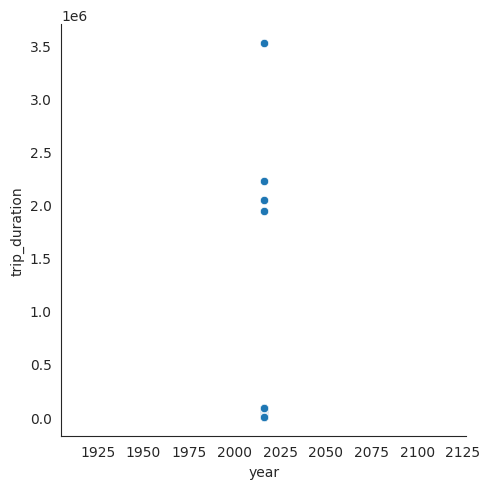

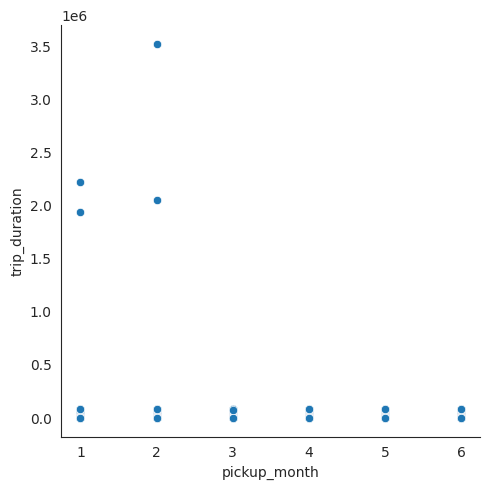

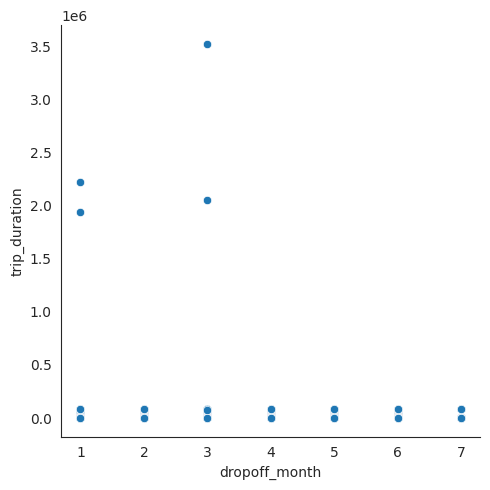

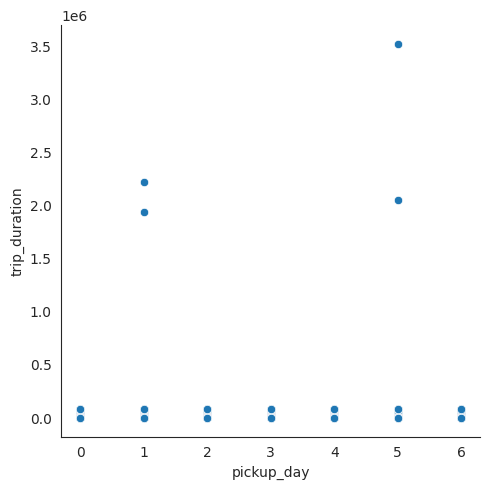

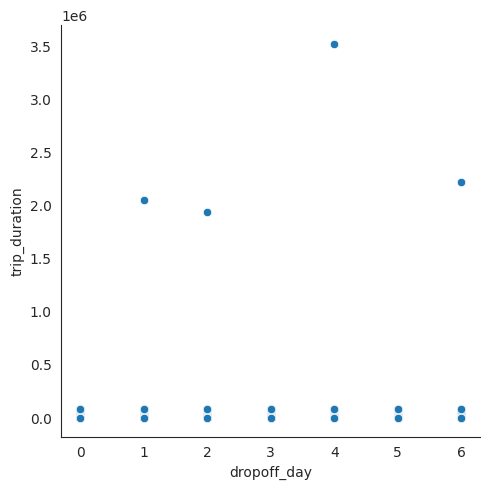

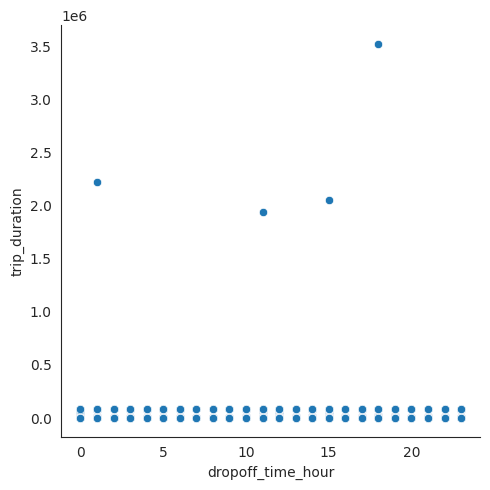

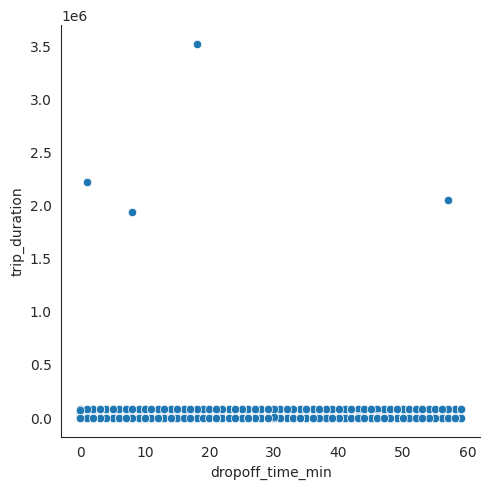

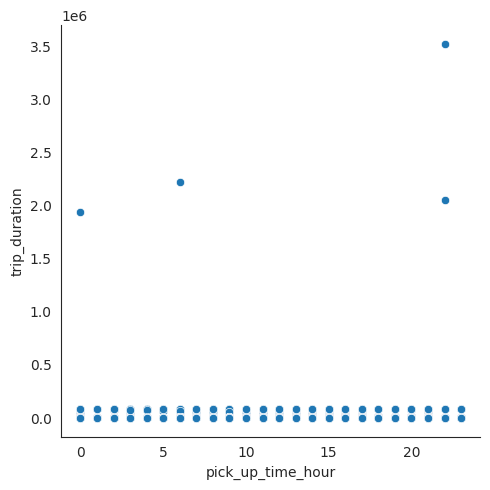

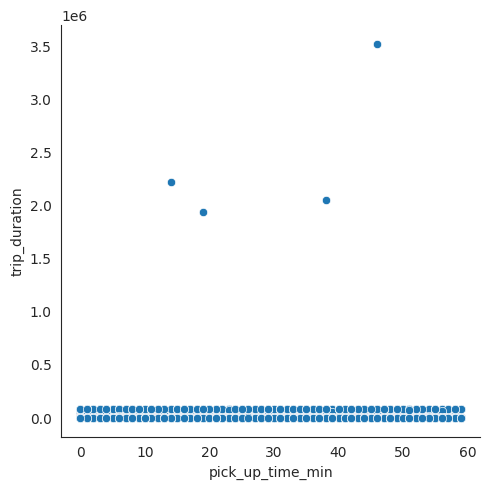

In [49]:
fig,ax=plt.subplots(figsize=(10,6))
for col in col:
  sns.relplot(data=df, x=df[col], y="trip_duration")




##### 1. Why did you pick the specific chart?

The Seaborn Relational Plot (relplot) allows us to visualise how variables within a dataset  are related to each other.It uses scatter plot and when specified line plot to visualize the relationship between the variables in the dataset.I used Relational plot to visualise the realationship present between the dependent variable 'trip_duration' and various other independent variables present in the NYC taxi trip data set. 

##### 2. What is/are the insight(s) found from the chart?

From the above plots we can see the relatioship between the dependent variable 'trip_duration' and other independent variables.From the plots we can figure out that there is no much relationship or linear relationship between the dependent variable and other independent variables.We can only see a slight linear relationship between 'trip_duration' and 'distance'.For rest of all the independent variables there is no  relationship  with target variable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Relation plot is to only visualize the relation between the two variables in the dataset.It doesnt have any contribution to the business .


 Chart - 9 - Corelation-HeatMap

<Axes: >

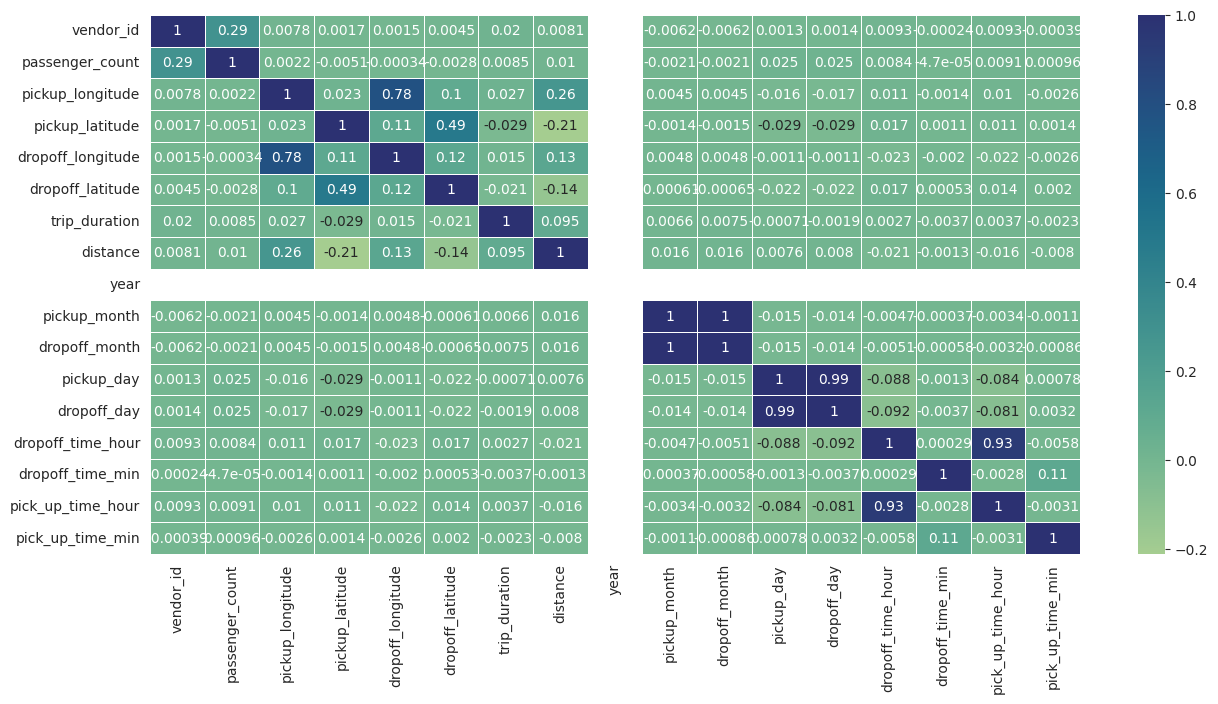

In [50]:
# Chart - 9- visualization code
# Visualizing the corelation between the variables.
# Correlation Heatmap visualization code

plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), linewidths = 0.5, annot = True ,cmap="crest")








##### 1. Why did you pick the specific chart?

Heat Maps are graphical representations of data that utilize color-coded systems where values are depicted by color.It represents the coefficients to visualize the strength of correlation among variables. It helps find features that are best for Machine Learning model building.It transforms the correlation matrix into color coding .Each cell in the heatmap shows the corelation  between two variables.The corelation values varies from the range [-1,1]

##### 2. What is/are the insight(s) found from the chart?

From the above plot I could infer that there is a high corelation between 'pick_up_time_hour' and 'dropoff_time_hour' which is around 93%.There is also a high corelation between  'pickup_day' and dropoff_day' which is around 99%.There is a slight corelation between 'pickup_longitude' and 'dropoff_longitude' which is around 78%.There is also a slight corelation between the variables 'pickup_latitude' and 'dropoff_latitude' which is around 49% 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


We use HeatMap only to check the corelation between the variables in the datset.This analysis will be very usefull in futher creating machine learning models.However this analysis will not contribute anything to business.

#### Chart - 10 -Histogram plot and Box plot for  the features of the dataset

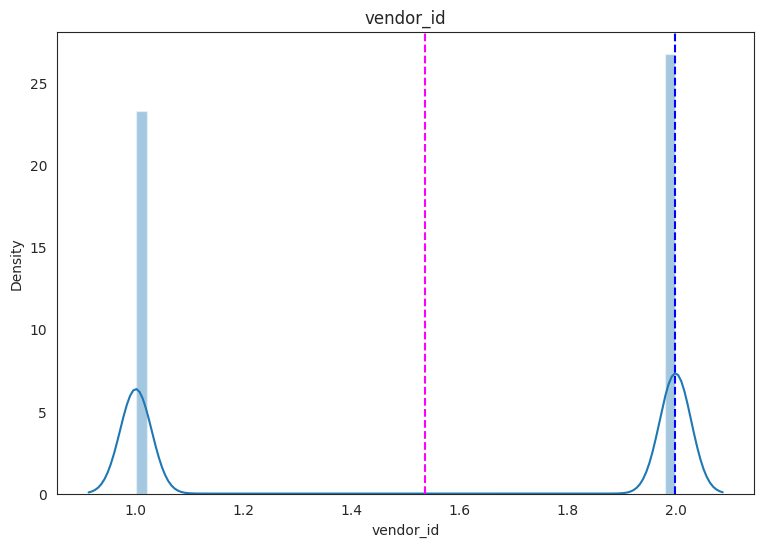

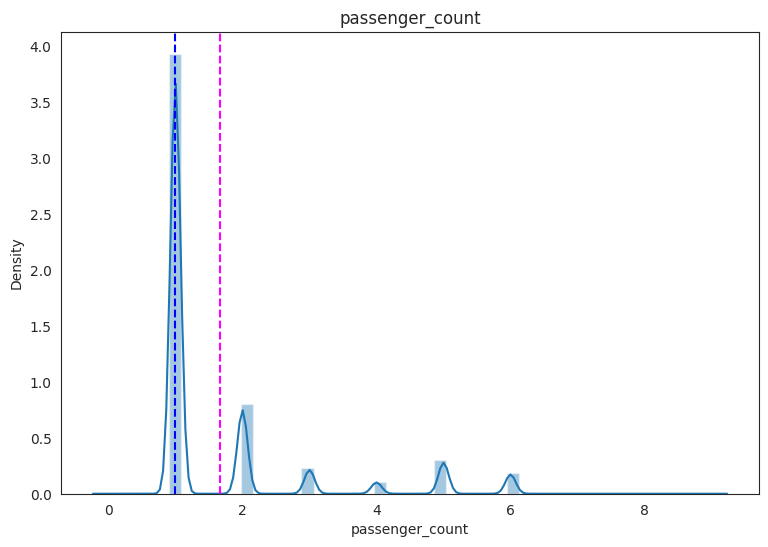

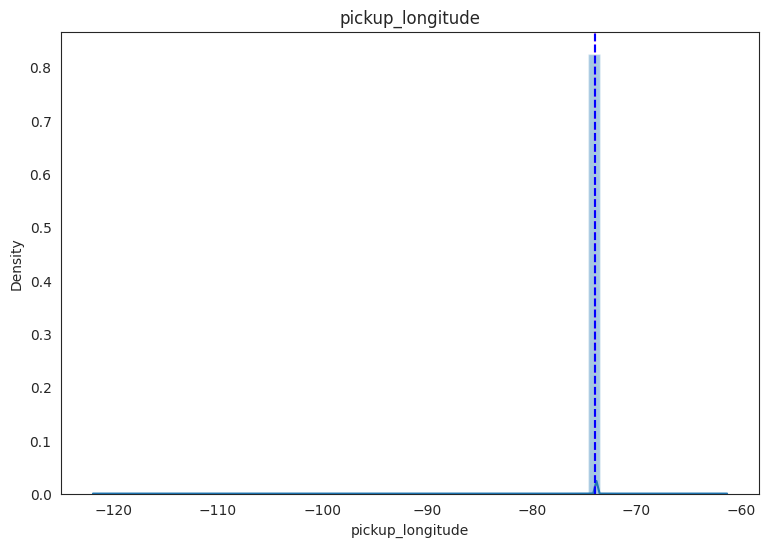

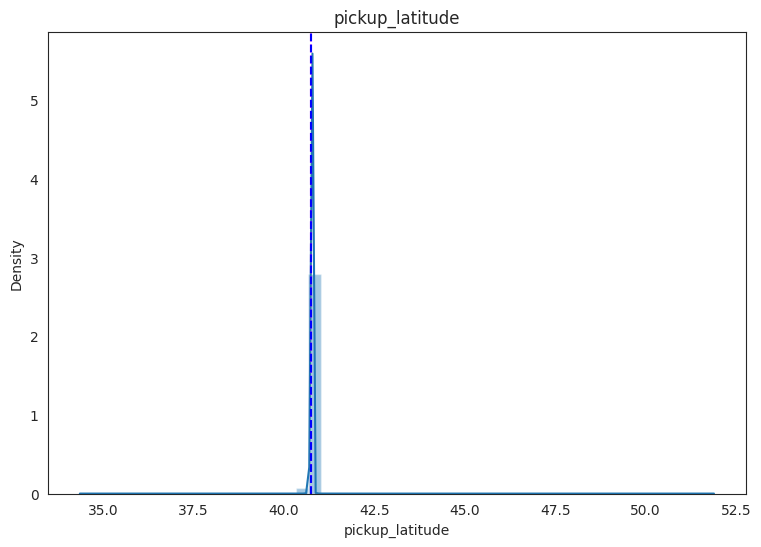

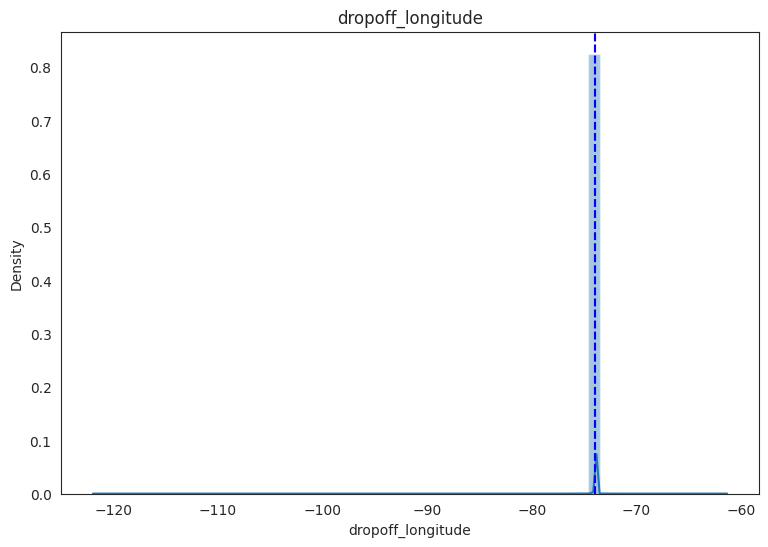

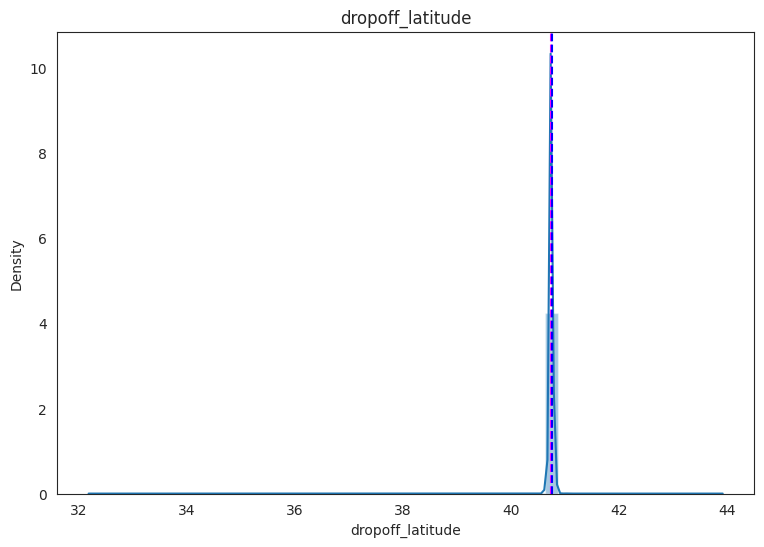

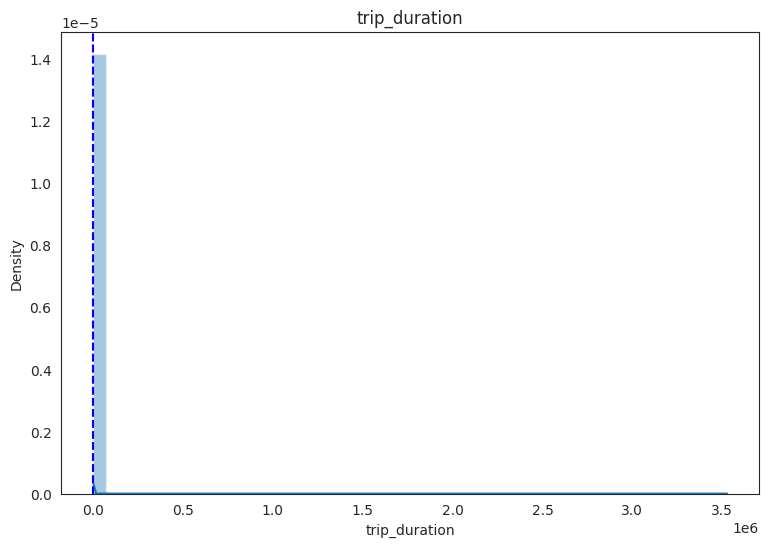

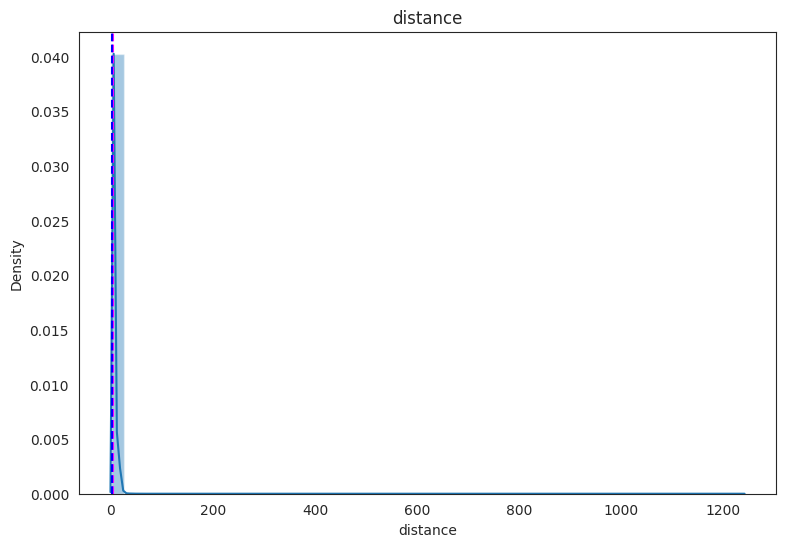

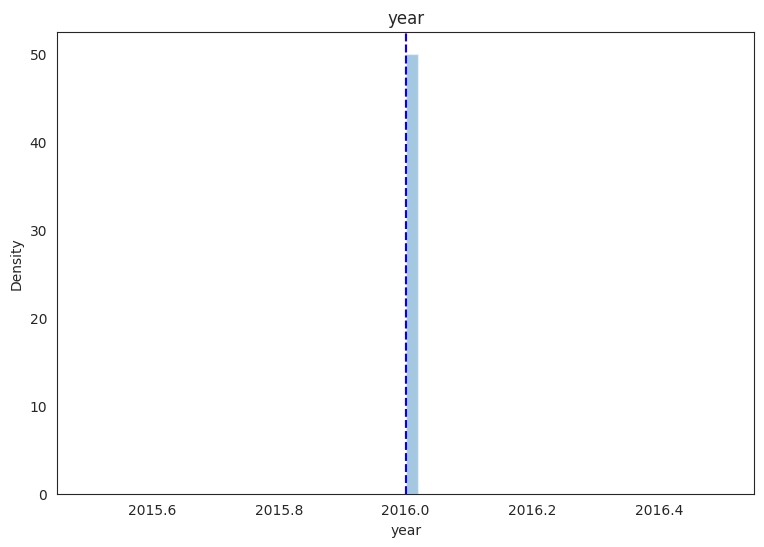

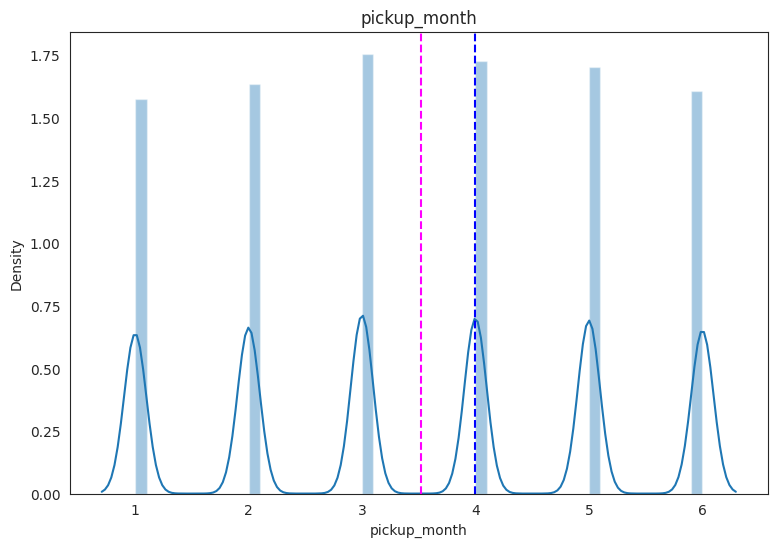

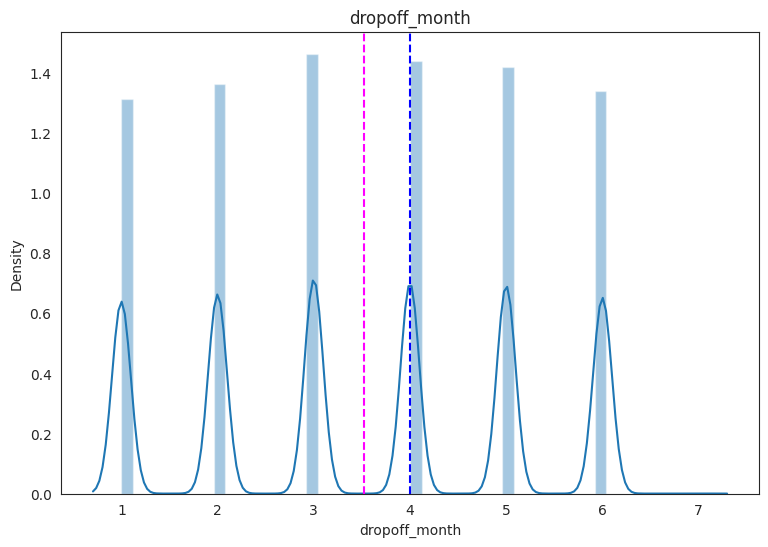

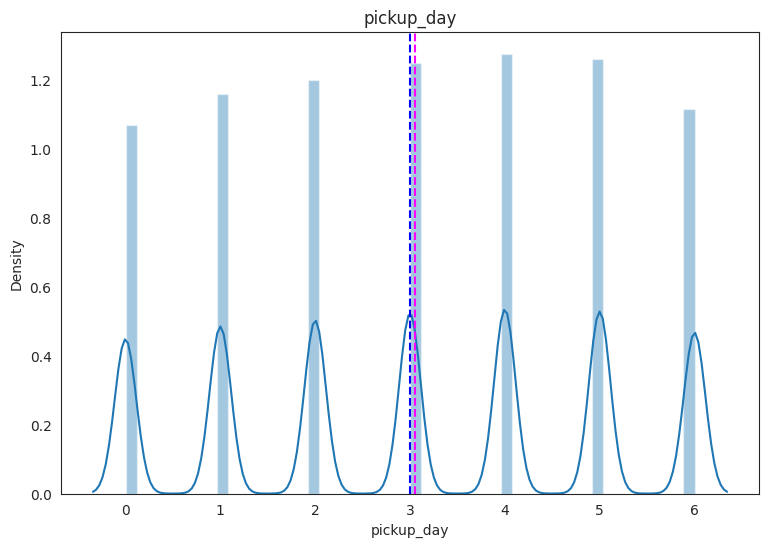

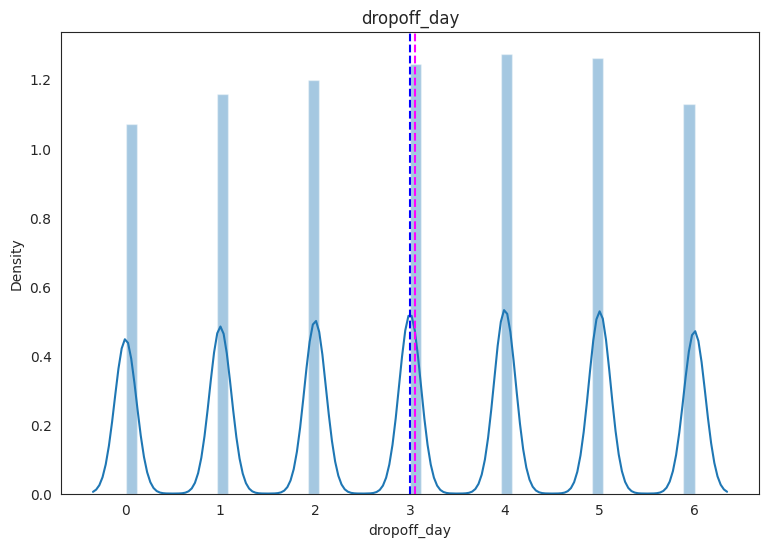

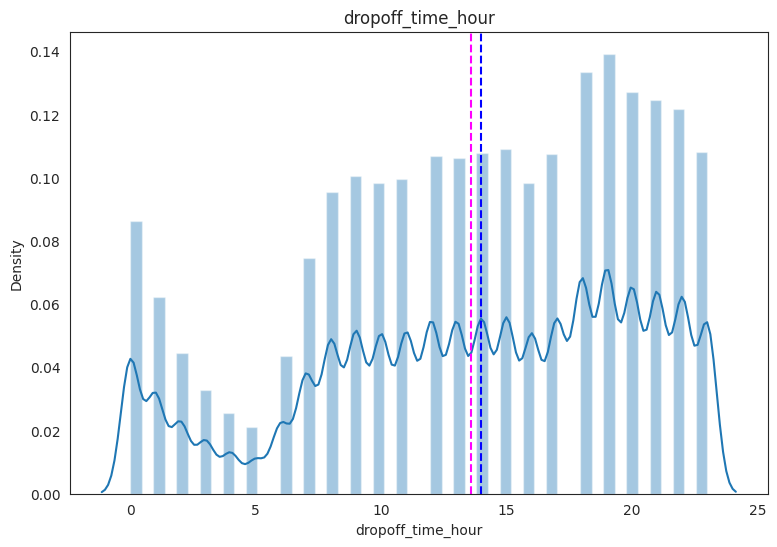

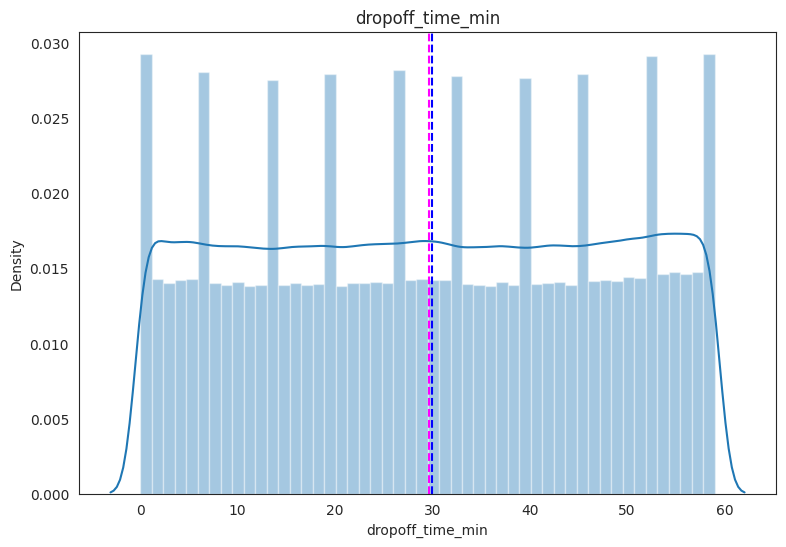

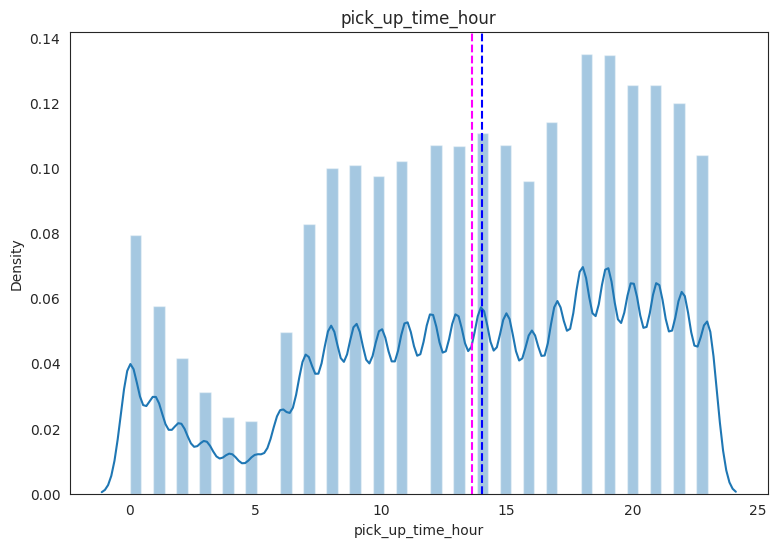

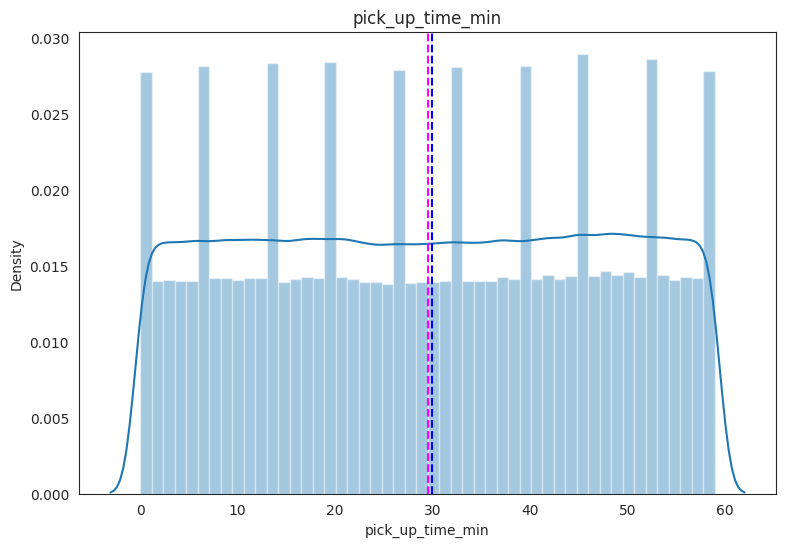

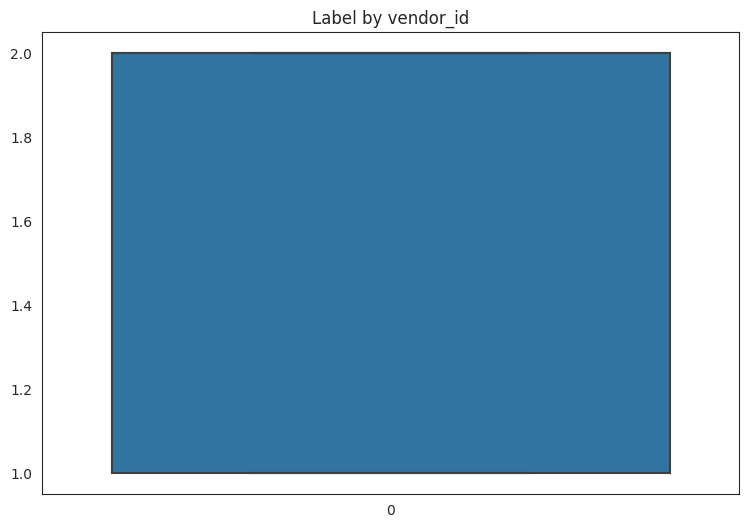

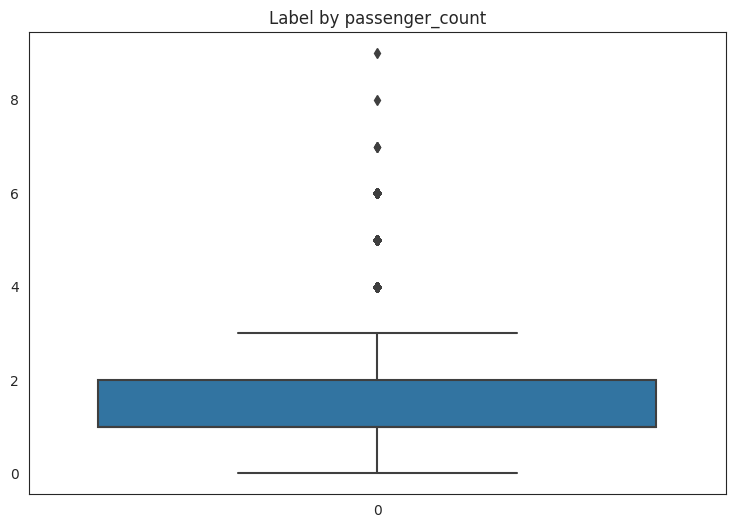

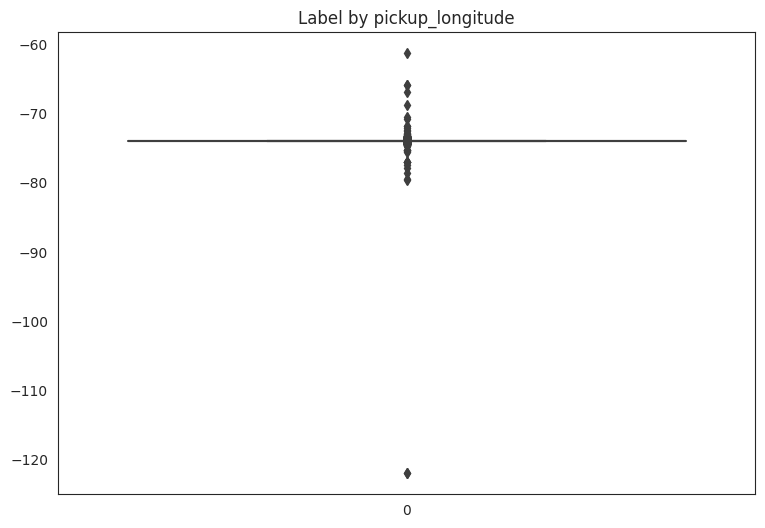

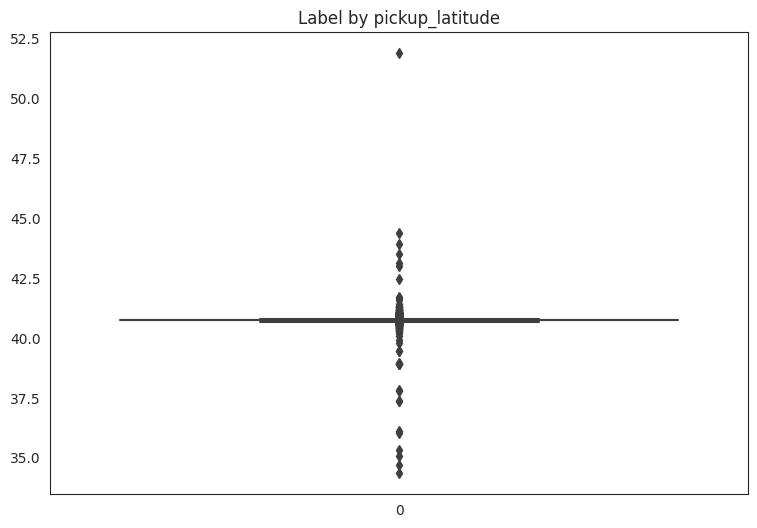

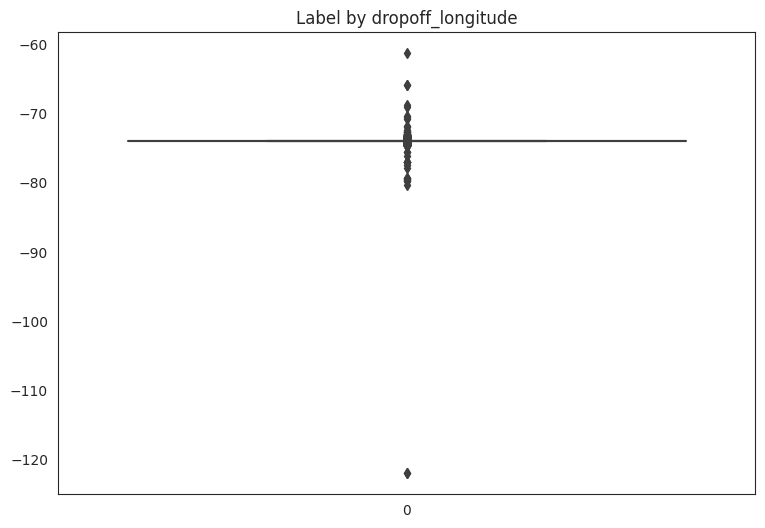

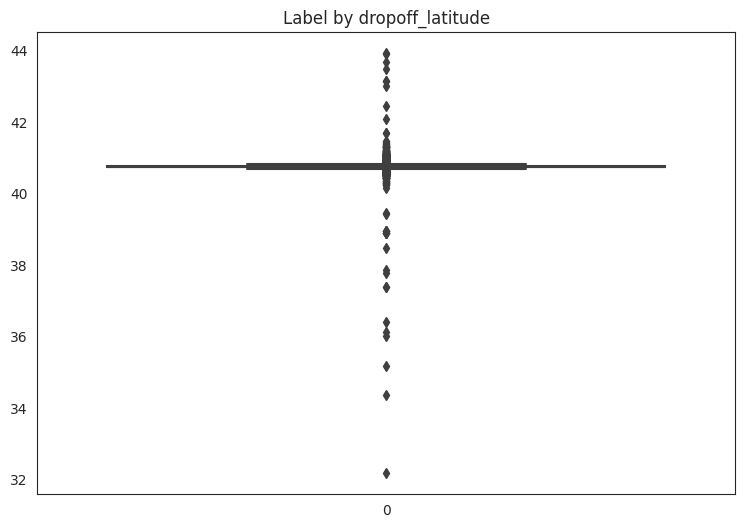

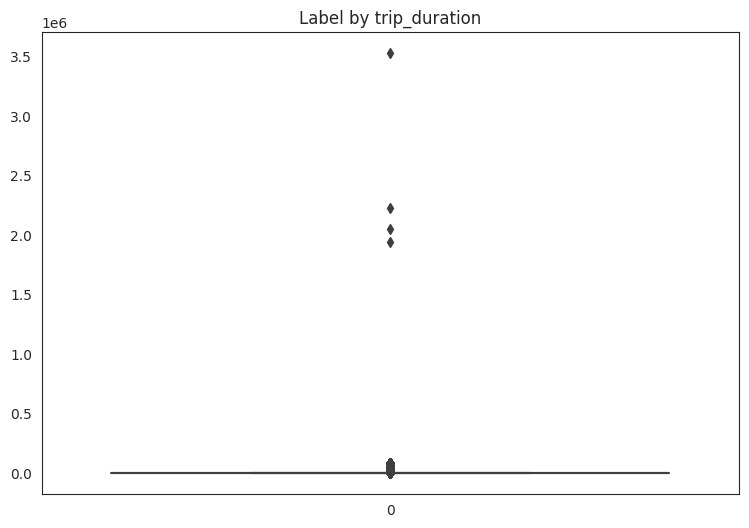

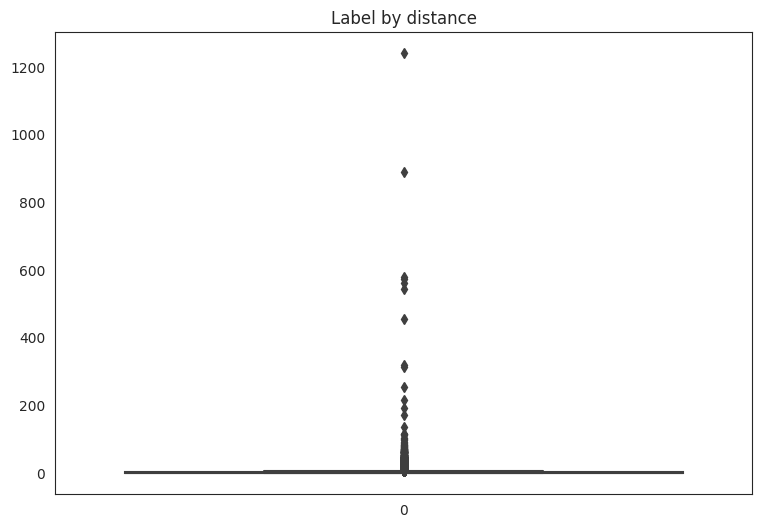

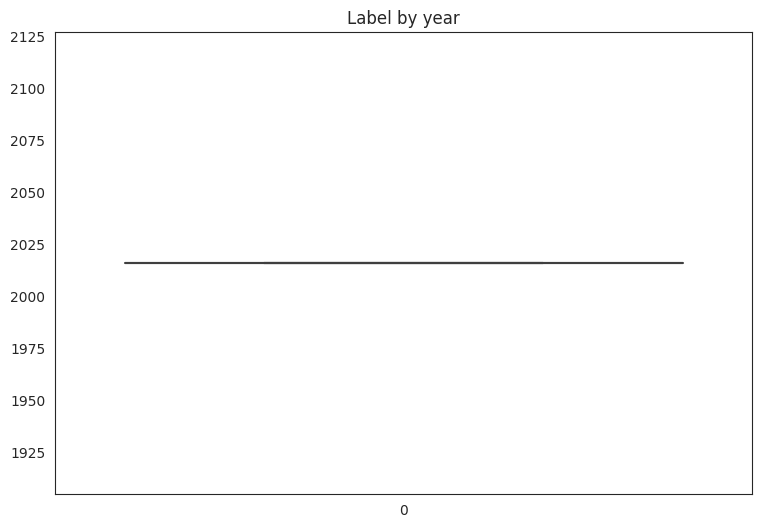

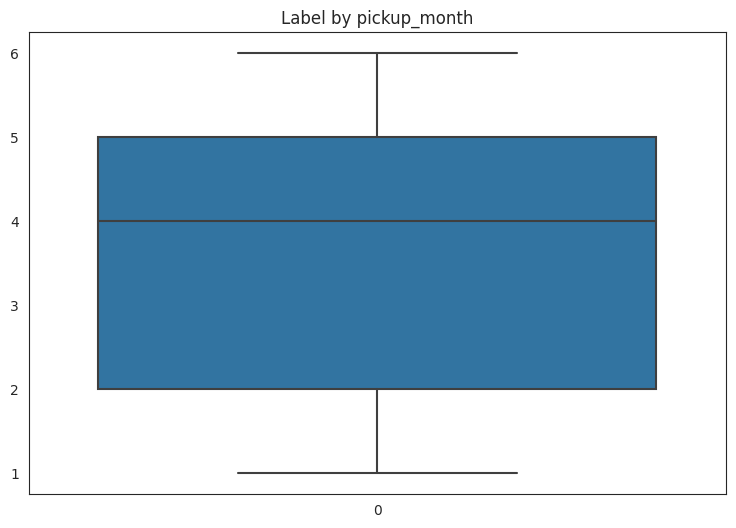

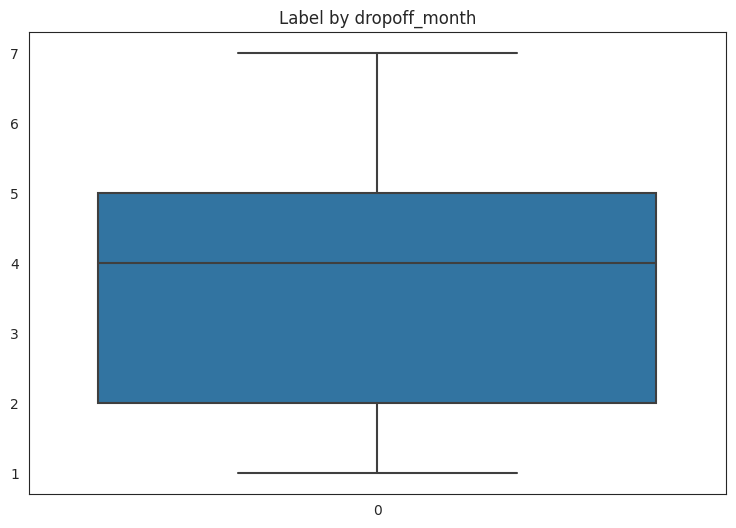

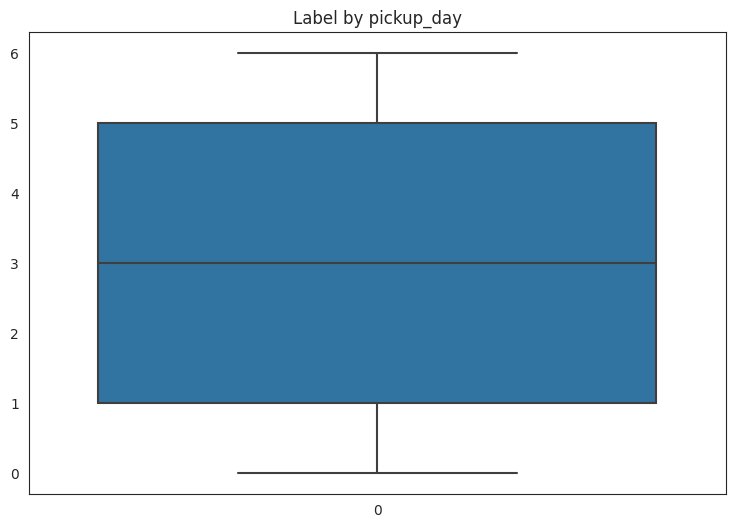

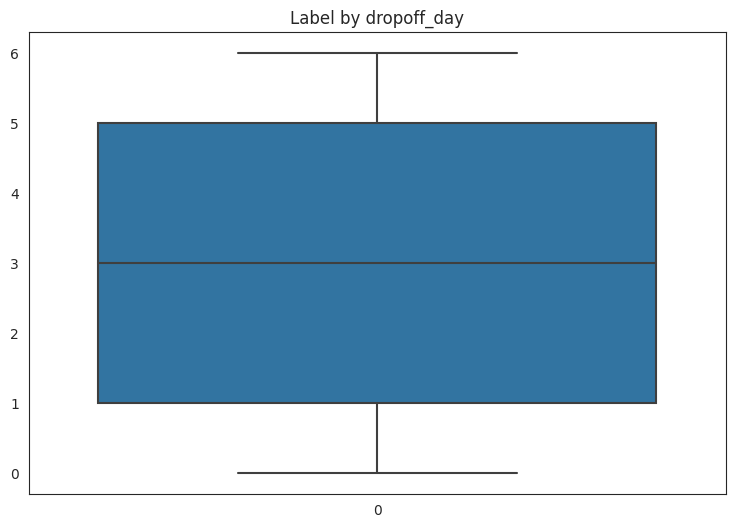

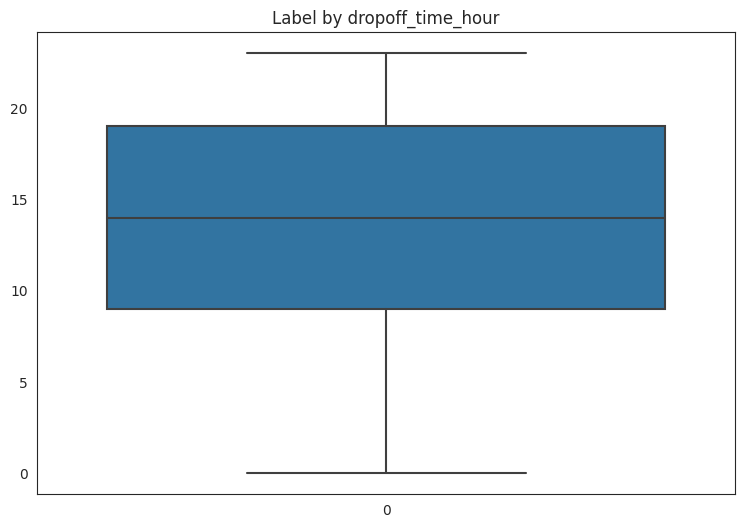

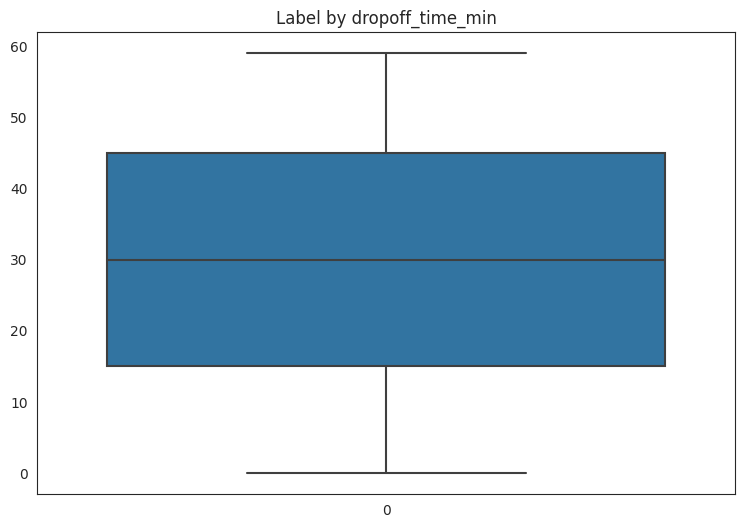

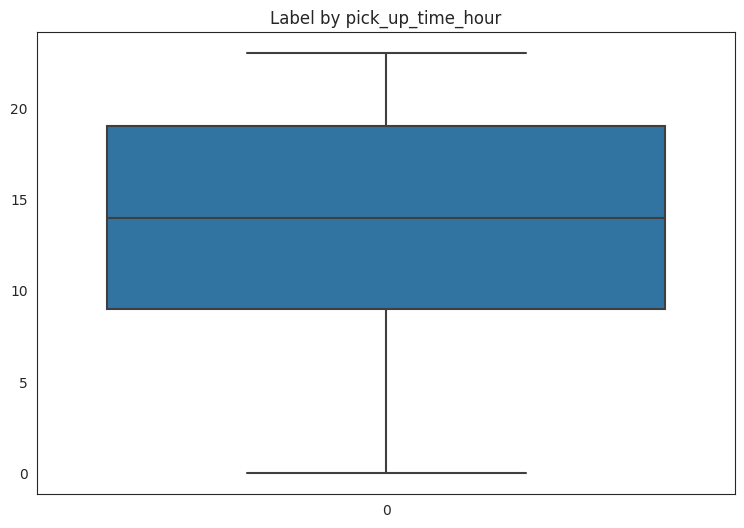

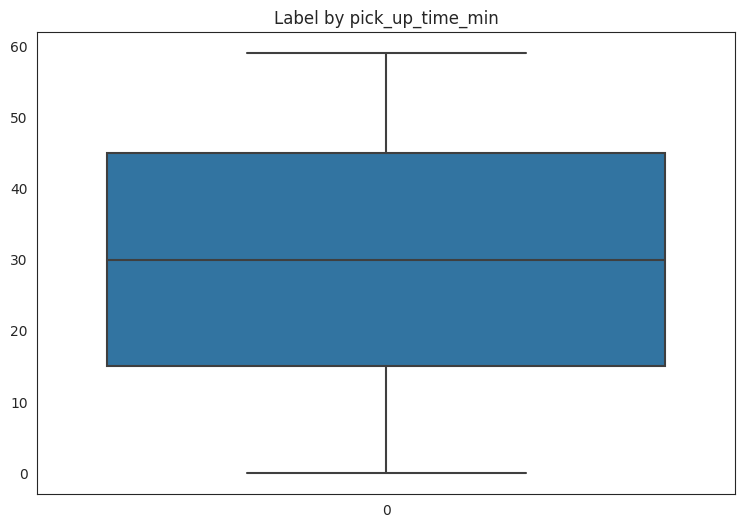

In [51]:
from sqlalchemy.sql.base import elements
# Chart - 9 visualization code
# Visualizing code of hist plot for each columns to know the data distibution
for c in df.describe().columns:
  chart=plt.figure(figsize=(9,6))
  ax=chart.gca()
  feature= (df[c])
  sns.distplot(df[c])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed')
  ax.axvline(feature.median(),color='blue', linestyle='dashed')

  ax.set_title(c)
plt.show()


# Visualizing code of box plot for each columns to know the data distibution
for i in df.describe().columns:
    image = plt.figure(figsize=(9, 6))
    ax = image.gca()
    sns.boxplot(df[i])
    ax.set_title('Label by ' + i)
plt.show()


##### 1. Why did you pick the specific chart?

The histogram is used to illustrate the major features of the distribution of the data in a convenient form It shows the frequency of numerical data using rectangles. The height of a rectangle (the vertical axis) represents the distribution frequency of a variable (the amount, or how often that variable appears).

Thus, I used the histogram plot to analyse the variable distributions over the whole dataset and to undersdtand its symmetricity.

Box  plots are very effective and easy to read, as they can summarize data from multiple sources and display the results in a single graph. Box and whisker plots allow for comparison of  data from different categories for easier, more effective decision-making by offering general information about a group of data's symmetry, skew, variance, and outliers.


Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

Almost all columns except 'pickup_time_hour' and dropoff_time_hour'are symmetrically distributed.However for most of the columns we can see that mean and median do not coincide.
In the boxplot we can see that  few of the columns like 'passenger_count' , 'trip_duration' , 'distance' , 'pickup_latitude'  , 'pickup_longitude' , 'dropoff_latitude' and 'dropoff_longitude' has outliers which has to be treated.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Just a histogram and box plot cannot define business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart - 11 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

Therefore, I used pair plot to analyse the patterns of data and realationship between the features. It is very much same as the correlation map but here we can see the graphical representation of relationship between the pairs of vaariables.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, there is a very less linear relationship between the variables of the dataset.

## ***5. Hypothesis Testing***

 Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Out of a sample of 500 taxis booked it is found that 55% of them were booked by vendor_id:2 .If the claim is that majority of bookings were made by vendor_id:2,find its test statistic


2. Average number of passengers in a taxi is 2


3. Out of the various trips, the average trip duration is 600 seconds

In [ ]:
#Calculating the variance and zcdf
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='left':
      return z
    elif tailed == 'right':
      return 1-z
    elif tailed == 'two_tailed':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"



**Hypothetical Statement - 1**

Out of a sample of 500  taxis booked it is found that 55% of them were booked by vendor_id:2 .If the claim is that majority of bookings were made by vendor_id:2,find its test statistic

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Ho = 50

Alternate Hypothesis : Ha > 50

Test Type: Right Tailed Test


In [ ]:
# Perform Statistical Test to obtain P-Value
sample=df[(df["vendor_id"]==2)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 50
n=500
actual_value=55


In [ ]:
# Getting Z value
z = (actual_value - hypothesis_number)/math.sqrt(hypothesis_number)*(1-hypothesis_number)/n
# Getting P - Value
p = p_value(z=z,tailed='right',t="false",hypothesis_number=hypothesis_number,df=sample,col="vendor_id")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical test to obtain P-Value and found out the P-value to be 0.52 which is greater than the significance level.
Hence deriving the conclusion as "Failed To reject the Null Hypothesis.


##### Why did you choose the specific statistical test?

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= sample["vendor_id"]
sns.distplot(feature)
ax.axvline(feature.mean(),color='red', linestyle='dashed', linewidth=3)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("Dist plot for vendor_id")
plt.show()

As shown in the above plot the mean and median are coinciding with each other. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 2
Average number of passengers in a taxi is 2

State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : Ho = 2

Alternate Hypothesis : Ha != 2

Test Type : Two Tailed Test



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
sample_2=df[("passenger_count")].sample(n=50)
# Getting the required parameter values for hypothesis testing
hypothesis_number = 2


In [ ]:
sample_2.shape

In [ ]:
sample_mean = sample_2.mean()
size = len(sample_2)
std=(variance(sample_2))**0.5
n=50

In [ ]:
# Getting Z value
z = (sample_mean - hypothesis_number)*math.sqrt(n)/std 
# Getting P - Value
p = p_value(z=z,tailed='two_tailed',t="false",hypothesis_number=hypothesis_number,df=sample_2 , col="passenger_count")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical test to obtain P-Value and found out the P-value to be  greater than the significance level.
Hence deriving the conclusion as "Failed To reject the Null Hypothesis.






##### Why did you choose the specific statistical test?





In [ ]:
print(sample_2.mean())
print(sample_2.median())


In [ ]:
mean_median_difference=sample_2.mean()-sample_2.median()
print("Mean Median Difference is :-",mean_median_difference)

The differnce between the mean and meadian is very less.Hence it is a Normal distribution.Also the sample size is also comparitively more.Hence I Have used Z-Test to obtain the statistics.

## Hypothetical Statement - 3  
Out of the various trips, the average trip duration is 600 seconds

State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : mean = 600

Alternate Hypothesise : mean != 600

Type of Test : Two Tailed test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value by taking a sample of 80 bookings.
sample_3=df["trip_duration"].sample(n=80)
# Getting the required parameter values for hypothesis testing
hypothesis_number = 600
n=80


In [ ]:
z,p_value=stats.ttest_1samp(df["trip_duration"],hypothesis_number)

In [ ]:
print(p_value)
print(z)

In [ ]:
significance_level = 0.05
if p_value>significance_level:
 print("Failed to reject the Null Hypothesis.")
else:
  print("Null Hypothesis rejected Successfully ")

##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical test to obtain P-Value and found out that the P-value is less than the significance level.Hence rejecting the Null hypothesis sucessfully.

##### Why did you choose the specific statistical test?

In [ ]:
print(sample_3.mean())
print(sample_3.median())

In [ ]:
mean_median_difference=sample_3.median()- sample_3.mean()
print("Mean Median Difference is :-",mean_median_difference)

From the above code we can see that there is a huge difference between mean and median.Hence the data is skewed and not Normally distributed.We cannot perform z-test for skewed data.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests  can and should be used even for heavily skewed data.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Creating a copy of the dataset for further feature engineering
new_df=df.copy()
new_df.shape

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
new_df.dtypes

In [ ]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_features=[]
non_symmetric_features=[]
for i in new_df.describe().columns:
  if abs(new_df[i].mean()-new_df[i].median())<0.1:
    symmetric_features.append(i)
  else:
    non_symmetric_features.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_features)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_features)


In [ ]:
# For Symmetric features defining upper and lower boundry
def outlier_detection_symmetric(df0,feature):
  #print(feature)
  upper_boundary= (df0[feature].mean())+3*(df0[feature].std())
  lower_boundary= (df0[feature].mean())-3*(df0[feature].std())
  return upper_boundary,lower_boundary

In [ ]:
# Restricting the data to lower and upper boundry
for feature in symmetric_features :
 upper_limit ,lower_limit=outlier_detection_symmetric(df,feature)
 print("upper limit for feature" , feature,"=" ,upper_limit)
 print("lower limit for feature" , feature,"=",lower_limit)
 outlier_data=new_df[new_df[feature] <= lower_limit]
 outlier_data=new_df[new_df[feature] >= upper_limit]


From the above code we can infer that for the features 'year' , 'pickup_day' ,'dropoff_day' the values lies well within the range.Hence we will do the outlier treatment for rest of the features

In [ ]:
#outlier treatment for the feature 'pickup_latitude'
#from the above code we came to know that upper limit for pickup_latitude feature is :40.84 and lower limit is:40.65 .
new_df=new_df[new_df['pickup_latitude'] > 40.65 ]
new_df=new_df[new_df['pickup_latitude']  < 40.84]

In [ ]:
new_df.shape

In [ ]:
#outlier treatment for the feature 'pickup_longitude'
#from the above code we came to know that upper limit for pickup_longitude feature is :-73.76 and lower limit is:-74.18 .
new_df=new_df[new_df['pickup_longitude'] > -74.18 ]
new_df=new_df[new_df['pickup_longitude']  < -73.76]

In [ ]:
new_df.shape

In [ ]:
#outlier treatment for the feature 'dropoff_latitude'
#from the above code we came to know that upper limit for dropoff_latitude feature is :40.85 and lower limit is:40.64 .
new_df=new_df[new_df['dropoff_latitude'] > 40.64 ]
new_df=new_df[new_df['dropoff_latitude']  < 40.85]

In [ ]:
new_df.shape

In [ ]:
#outlier treatment for the feature 'dropoff_longitude'
#from the above code we came to know that upper limit for dropoff_longitude feature is :-73.76 and lower limit is:-74.18 .
new_df=new_df[new_df['dropoff_longitude'] > -74.18 ]
new_df=new_df[new_df['dropoff_longitude']  < -73.76]

In [ ]:
new_df.shape

In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_detection_skewedfeature(df1,feature):
  df1.sort_values(by=feature)
  IQR= df1[feature].quantile(0.75)- df1[feature].quantile(0.25)
  lower_limit=df1[feature].quantile(0.25)-(1.5*IQR)
  upper_limit =df1[feature].quantile(0.75)+(1.5*IQR)
  return upper_limit,lower_limit

In [ ]:
# Restricting the data to lower and upper boundry
for c in non_symmetric_features :
  upper_limit_outlier , lower_limit_outlier=outlier_detection_skewedfeature(df,c)
  print("lower_limit for the feature=" , c,lower_limit_outlier)
  print("upper_limit for the feature=" ,c, upper_limit_outlier)


For the features 'vendor_id' , 'dropoff_time_hour' , 'pick_up_time_hour' , 'dropoff_time_min', 'pick_up_time_min' , 'dropoff_time_min' the values lies well in between the upper and lower limit range.Hence we need to detect and treat outliers for rest of the features.

In [ ]:
#outlier treatment for the feature 'distance'
#from the above code we came to know that upper limit for distance feature is :7.84 and lower limit is:-2.73 .
new_df=new_df[new_df['distance'] > 0 ]#as distance can not be negative
new_df=new_df[new_df['distance']  < 7.8]

In [ ]:
new_df.shape

In [ ]:
#outlier treatment for the feature 'trip_duration'
#from the above code we came to know that upper limit for distance feature is :2092 and lower limit is:-620 .
new_df=new_df[new_df['trip_duration'] > 0]# as trip duration cannot be negative
new_df=new_df[new_df['trip_duration'] < 2092]


In [ ]:
new_df.shape

In [ ]:
#outlier treatment for the feature 'passenger_count'
#from the above code we came to know that upper limit for distance feature is :3.5 and lower limit is:-0.5 .
new_df=new_df[new_df['passenger_count'] > 0] #as passenger count cannot be nagative
new_df=new_df[new_df['passenger_count'] < 3.5]


In [ ]:
new_df.shape

In [ ]:
new_df

In [ ]:
# After Outlier Treatment showing the dataset distribution using box plot
# Visualising  code for the numerical columns 
for col in new_df.describe().columns:
  fig=plt.figure(figsize=(9,6))
  sns.boxplot(new_df[col])

In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_detection_skewedfeature(df1,feature):
  df1.sort_values(by=feature)
  IQR= df1[feature].quantile(0.75)- df1[feature].quantile(0.25)
  lower_limit=df1[feature].quantile(0.25)-(1.5*IQR)
  upper_limit =df1[feature].quantile(0.75)+(1.5*IQR)
  return upper_limit,lower_limit

In [ ]:
# Restricting the data to lower and upper boundry
for c in non_symmetric_features :
  upper_limit_outlier , lower_limit_outlier=outlier_detection_skewedfeature(df,c)
  print("lower_limit for the feature=" , c,lower_limit_outlier)
  print("upper_limit for the feature=" ,c, upper_limit_outlier)


For the features 'vendor_id' , 'dropoff_time_hour' , 'pick_up_time_hour' , 'dropoff_time_min', 'pick_up_time_min' , 'dropoff_time_min' the values lies well in between the upper and lower limit range.Hence we need to detect and treat outliers for rest of the features.

In [ ]:
#outlier treatment for the feature 'distance'
#from the above code we came to know that upper limit for distance feature is :7.84 and lower limit is:-2.73 .
new_df=new_df[new_df['distance'] > 0 ]#as distance can not be negative
new_df=new_df[new_df['distance']  < 7.8]

In [ ]:
new_df.shape

In [ ]:
#outlier treatment for the feature 'trip_duration'
#from the above code we came to know that upper limit for distance feature is :2092 and lower limit is:-620 .
new_df=new_df[new_df['trip_duration'] > 0]# as trip duration cannot be negative
new_df=new_df[new_df['trip_duration'] < 2092]


In [ ]:
new_df.shape

In [ ]:
#outlier treatment for the feature 'passenger_count'
#from the above code we came to know that upper limit for distance feature is :3.5 and lower limit is:-0.5 .
new_df=new_df[new_df['passenger_count'] > 0] #as passenger count cannot be nagative
new_df=new_df[new_df['passenger_count'] < 3.5]


In [ ]:
new_df.shape

In [ ]:
#dataset after removal of outliers
new_df

##### What all outlier treatment techniques have you used and why did you use those techniques?

First I separeted the symmetric and skew symmetric features in my dataset.Then I defined the upper limit and lower limits for each variable.Further I restricted the highest value of each column to the upper limit and the lowest value of each feature to the lower limit.Presence of outliners may cause problems during model fitting.Hence to avoid negative influence to the training process of machine learning algorithms and statistical analysis , outliner treatement is necessary.

In a Normal distribution where we have a symmetric curve and outliners are present , we can set the upper and lower boundaries by taking standard deviation into cosideration.

For data which is skewed and dosent have a symmetric curve we can detect outliers using IQR method.

Outlier detection using IQR method:
IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles are the values which separate the 4 equal parts.

Q1 represents the 25th percentile of the data.
Q2 represents the 50th percentile of the data.
Q3 represents the 75th percentile of the data.
If a dataset has 2n / 2n+1 data points, then

Q1 = median of the dataset.

Q2 = median of n smallest data points.

Q3 = median of n highest data points.

IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. 
The data points which fall below Q1 – 1.5 IQR (lower limit) or above Q3 + 1.5 IQR(Upper limit)  are outliers.



### 3. Categorical Encoding

In [ ]:
taxi_trip=new_df.copy()

In [ ]:
categorical_columns=list(set(new_df.columns.to_list()).difference(set(new_df.describe().columns.to_list())))
categorical_columns

In [ ]:
#Encoding 'Store_and_fwd_flag' using One Hot Encoding
taxi_trip=pd.get_dummies(taxi_trip,columns = ['store_and_fwd_flag'])

In [ ]:
taxi_trip.head(3)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have encoded the 'Store and Fwd Flag' feature using 'One hot encoding' method.This feature provides information of wether a vehicle stores the ride details before sending it to the vendor.It has two unique values 'Y' and 'N'.Since the feature has only two unique values which are not ordinal,I have used 'One hot encoding' method to encode this categorical feature.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part.**

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
taxi_trip['trip_duration_hour']=df['trip_duration']/3600

In [ ]:
taxi_trip['trip_duration_hour']

In [ ]:
taxi_trip['speed']=taxi_trip['distance']/taxi_trip['trip_duration_hour']
taxi_trip['speed'].reset_index

Created new column called 'speed'.

In [ ]:
taxi_trip.shape

#### 2. Feature Selection

In [ ]:
# Checking the shape of dataset
taxi_data=taxi_trip.copy()
taxi_data.shape

In [ ]:
#Droppimg the columns which are not usefull
taxi_data.drop(columns={'id' ,'pickup_datetime' ,'dropoff_datetime','trip_duration_hour'} , axis=1 ,inplace=True)


In [ ]:
taxi_data.head()

In [ ]:
taxi_data.dtypes

In [ ]:
# Method to drop the constant features by Quasi Constant Feature
from  sklearn.feature_selection import VarianceThreshold
variance_threshold= VarianceThreshold(threshold=0.05)
variance_threshold.fit(taxi_data)
variance_threshold.get_support()
col = [c for c in taxi_data.columns if c not in taxi_data.columns[variance_threshold.get_support()]]
if "trip_duration" in col:
  col.remove("trip_duration")
else:
  pass
taxi_data_changed=taxi_data.drop(col,axis=1)
  

In [ ]:
# Checking the shape after feature dropped
taxi_data_changed.shape

In [ ]:
taxi_data_changed.columns

In [ ]:
# Getting  column names
dataset_columns_required=taxi_data_changed.columns.to_list()
dataset_columns_required.extend(['id','pickup_datetime','dropoff_datetime'])
dataset_columns_required

In [ ]:
# Correlation Heatmap visualization code
corr = taxi_data_changed.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
# Checking Variable Inflation Factor
# the independent variables set
X = taxi_data_changed.copy()
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)
  
for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])


In [ ]:
# Finding the collineariaty of all features and finding multicolinearity
def feature_correlation(df2,threshold):
  column_correlation=set()
  corr_matrix= df2.corr()
  for i in range (len(corr_matrix.columns)):#i stores the number of rows in matrix
    for j in range(i):#j stores the number of columns in matrix
      if abs (corr_matrix.iloc[i,j])>threshold:#checking the threshold value of each value in matrix 
        colmn=corr_matrix.columns[i]
        column_correlation.add(colmn)
  return list(column_correlation)#returns the list of columns whose collinearity value is greater than the threshold,which are highly corelated.



In [ ]:
taxi_data_changed.columns

In [ ]:
# Getting multicolinear columns and dropping them 
highly_correlated_columns=feature_correlation(taxi_data_changed,0.7)
if "trip_duration"  in highly_correlated_columns:#checking if target variable is there in the list of corelated columns
  highly_correlated_columns.remove("trip_duration")
if "distance" in highly_correlated_columns:
  highly_correlated_columns.remove("distance")
if "speed" in highly_correlated_columns:
  highly_correlated_columns.remove("speed")
print(highly_correlated_columns)
# As the features "distance" , :"speed" are important features and "trip duration" is target variable we are not taking it in "highly correlated columns"

In [ ]:
taxi_data_changed.drop(highly_correlated_columns,axis=1,inplace=True)

In [ ]:
taxi_data_changed.columns

In [ ]:
# Correlation after dropping the required columns
# Correlation Heatmap visualization code
corr = taxi_data_changed.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
# Again checking VIF after dropping highly corelated features
# the independent variables set
X = taxi_data_changed.copy()
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data
  
for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])


In [ ]:
taxi_data_changed.drop("vendor_id" , axis=1 ,inplace=True)
#We are not deleting the columns trip duration , distance and speed as they are very important. Also feature 'Trip_duration' is target variable.

In [ ]:
# After Feature Selection checking the shape left with
taxi_data_changed.shape

##### What all feature selection methods have you used  and why?

I used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF. 

Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

1st I dropped columns having constant or quasi constant variance. Then using pearson corelation I removed the columns having multicolinearity and again validate the VIFs for each feauture and found some features having VIF of more than 5-10 and I considered it to be 8 and again manipulated some features and again dropped multicolinear columns to make the VIF less than 8. The features got decreased from 21 to 9.

##### Which all features you found important and why?

In [ ]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  random_model= RandomForestRegressor(n_estimators=75)
  # Fit the model
  random_model.fit(x,y)
  # get the importance of thr resulting features
  feature_importances= random_model.feature_importances_
  # Create a data frame for visualization
  features_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": feature_importances})
  features_df.set_index('Importances')
  # Sort in ascending order to better visualization
  features_df= features_df.sort_values('Importances')
  return features_df

In [ ]:
# Getting feature importance of selected features
randomforest_embedded(x=taxi_data_changed.drop(["trip_duration"],axis=1),y=taxi_data_changed["trip_duration"])

I have used Random Forest embedded method to find out the importance of features.Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration.Embedded methods combines the advantageous aspects of both Filter and Wrapper feature selection methods.Embedded methods perform feature selection and training of the algorithm in parallel.Random Forest uses mean decrease impurity (Gini index) to estimate a feature’s importance. The lower the value, the more important the feature is.

### 6. Data Transformation

In [ ]:
taxi_data_changed.shape

In [ ]:
# Getting symmetric and skew symmetric features 
symmetric_feature=[]
non_symmetric_feature=[]
for c in taxi_data_changed.describe().columns:
  if abs(taxi_data_changed[c].mean()-taxi_data_changed[c].median())<0.1:
    symmetric_feature.append(c)
  else:
    non_symmetric_feature.append(c)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)
# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
nyc_data=taxi_data_changed.copy()

In [ ]:
nyc_data

In [ ]:
taxi_data_changed['trip_duration'].max()

In [ ]:
nyc_data['trip_duration']=np.log(nyc_data['trip_duration'])


In [ ]:
nyc_data['trip_duration'].max()

In [ ]:
nyc_data['distance']=np.log(nyc_data['distance'])


In [ ]:
nyc_data['speed']=np.log(nyc_data['speed'])

In [ ]:
nyc_data['passenger_count']=np.log(nyc_data['passenger_count'])

In [ ]:
nyc_data['pickup_month']=np.log(nyc_data['pickup_month'])

In [ ]:
nyc_data

In [ ]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in nyc_data.loc[:,non_symmetric_feature]:
  print(col)
  fig=plt.figure(figsize=(9,6))
  feature= (nyc_data[col])
  sns.distplot(feature , fit=norm)
  ax=fig.gca()
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

From the above code I found out that there were eight features that werent following the guassian distribution.Thus I used the Log Trasformation technique to achieve guassian distribution for these features.I tried with  other techniques and found out that this Log transformation to be the more suitable one.




---



### 7. Data Scaling

##### Which method have you used to scale you data and why?

In [ ]:
# Standardizing the required column
scaler=StandardScaler()
nyc_data['pick_up_time_min'] = scaler.fit_transform(nyc_data['pick_up_time_min'].values.reshape(-1,1))

In [ ]:
nyc_data['dropoff_time_min']=scaler.fit_transform(nyc_data['dropoff_time_min'].values.reshape(-1,1))

In [ ]:
#nyc_data.drop('pick_up_time_min' , axis=1 , inplace=True)

In [ ]:
nyc_data['dropoff_time_hour']=scaler.fit_transform(nyc_data['dropoff_time_hour'].values.reshape(-1,1))

In [ ]:
#nyc_data.drop('dropoff_time_hour' , axis=1 , inplace=True)

In [ ]:
# Checking the dataset
nyc_data.head()

When we are using an algorithm that assumes your features have a similar range, you should use feature scaling.Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias.

When the ranges of the features differ much then we should use feature scaling. If the range does not differ a lot for eaxample one of them is between 0 and 2 and the other one is between -1 and 0.5 then we can leave them as it's. However, you should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

We Use Standardization when your data follows Gaussian distribution.
We Use Normalization when your data does not follow Gaussian distribution.

So,In my data 'pickup_time_min' , dropoff_time_min' , 'dropoff_time_hour' columns have large data difference and are following guassian distribution.Hence , I have done Standardization on these features using standardscaler().


### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.

Dimensionality reduction brings many advantages to your machine learning data, including: Fewer features mean less complexity. We will need less storage space because we have fewer data. Fewer features require less computation time.

It is commonly used in the fields that deal with high-dimensional data, such as speech recognition, signal processing, bioinformatics, etc. It can also be used for data visualization, noise reduction, cluster analysis, etc.It helps in reduction of highly corelated and redundant features.



In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 80:20 ratio
 #Create the data of independent variables
x= nyc_data.drop("trip_duration" ,axis=1).values
# Create the data of dependent variable
y = nyc_data["trip_duration"].values

X_train, X_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

##### What data splitting ratio have you used and why? 

In order to build a reliable machine learning model, we need to split our dataset into the training , and test data set.
Training sets are commonly used to estimate different parameters or to compare different model performance. The testing data set is used after the training is done. The training and test data are compared to check that the final model works correctly.
The training set should not be too small; else, the model will not have enough data to learn. On the other hand, if the validation set is too small, then the evaluation metrics  will have large variance and will not lead to the proper tuning of the model.
Since the data is is pretty huge I have split the data into 80:20 ratio.


### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Since the data set is an example of Machine learning Regression , Handling Imbalanced dataset will not be needed.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

## ***7. ML Model Implementation***

# ML Model - 1 -Implementing Linear Regression

In [ ]:
# ML Model - 1 Implementation
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train,y_train)

1.0

In [ ]:
# Checking the coefficients
reg.coef_

array([ 4.73651100e-17,  1.00000000e+00,  1.37043155e-15,  1.11022302e-16,
        2.77555756e-16,  1.73472348e-17, -1.01047642e-16, -1.00000000e+00])

In [ ]:
# Checking the intercept value
reg.intercept_

8.188689124444226

In [ ]:
# Predict on the model
y_pred = reg.predict(X_test)


In [ ]:
predictions = pd.DataFrame({'Actual': y_test , 'Predicted': y_pred})

In [ ]:
predictions

,Actual,Predicted
0,5.872118,5.872118
1,6.973543,6.973543
2,6.413459,6.413459
3,5.950643,5.950643
4,6.817831,6.817831
...,...,...
230317,6.122493,6.122493
230318,6.906755,6.906755
230319,5.529429,5.529429
230320,6.475433,6.475433


In [ ]:
predictions = pd.DataFrame({'Actual': y_test , 'Predicted': y_pred})

In [ ]:
predictions

,Actual,Predicted
0,5.872118,5.872118
1,6.973543,6.973543
2,6.413459,6.413459
3,5.950643,5.950643
4,6.817831,6.817831
...,...,...
230317,6.122493,6.122493
230318,6.906755,6.906755
230319,5.529429,5.529429
230320,6.475433,6.475433


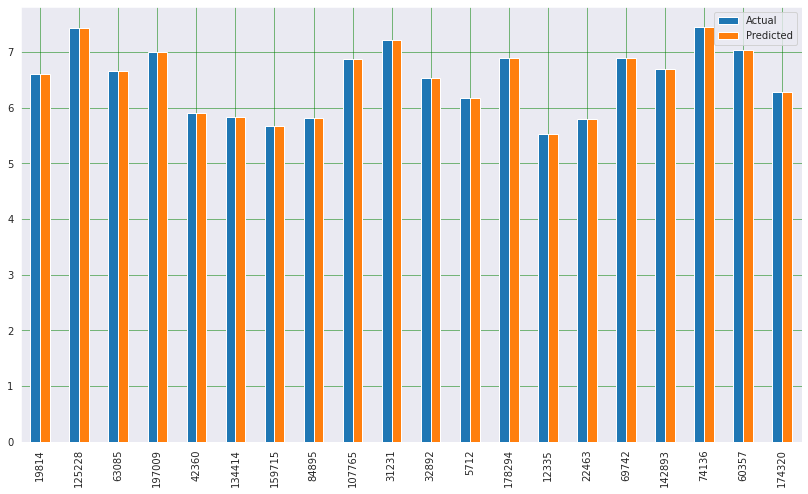

In [ ]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

The above plot is a bar plot that shows the actual and compared vales for each of the observations.Bar charts should be used when you are showing segments of information.Vertical bar charts are useful to compare different categorical or discrete variables, such as age groups, classes etc.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" , r2)

R2 : 1.0


In [ ]:
#Adjusted R2
adjusted_R2=1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2:" , adjusted_R2)

Adjusted R2: 1.0


In [ ]:
#calculatiing the Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print("MSE:" , MSE)

MSE: 5.319416408296043e-28


In [ ]:
#Calculating the Root Mean Squared Error.
RMSE=np.sqrt(MSE)
print("RMSE:" , RMSE)

RMSE: 2.3063860059183596e-14


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used Linear regression algorithm to create the model. 
I did get good results for this model.
I have got the 'reg_score' as 1 whis is a pretty good value.
Also the 'Coeffient of determination or the R2 ' value is also 1. R2
 is defined as :
            (1-u/v), where 
 'u' is the residual sum of squares ((y_true - y_pred)** 2).sum() and 
 'v' is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s) 
I have got 'Adjusted R2' value as 1.
Adjusted R2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If we add more and more useless variables to a model, adjusted r-squared will decrease. If we add more useful variables, adjusted r-squared will increase.It is defined as:
  
  
  
  R2(adjusted)=1-[(1-R2)(n-1)/n-k-1], where

  'n' is the number of datapoints in data sample
  'k' is the number of independent variables.
The MSE value is found to be:5.3217e-28 and the RMSE value is foumd to be:2.3068e-14


.



### ML Model - 2 - **Implementing Ridge and Lasso Regression:**

In [ ]:
# ML Model - 2 Implementation Of Ridge Regression
# Create an instance of the Ridge Regressor
L2=Ridge(alpha=0.1)

# Fit the Algorithm
L2.fit(X_train,y_train)


Ridge(alpha=0.1)

In [ ]:
# Predict on the model
# Making predictions on train and test data
y_pred_ridge= L2.predict(X_test)
y_pred_ridge_train=L2.predict(X_train)

In [ ]:
score=L2.score(X_train,y_train)
print("Ridge Score:" ,score )

Ridge Score: 0.9999999999997343


In [ ]:
predictions_ridge=pd.DataFrame(zip(y_test, y_pred_ridge), columns = ['actual', 'pred'])


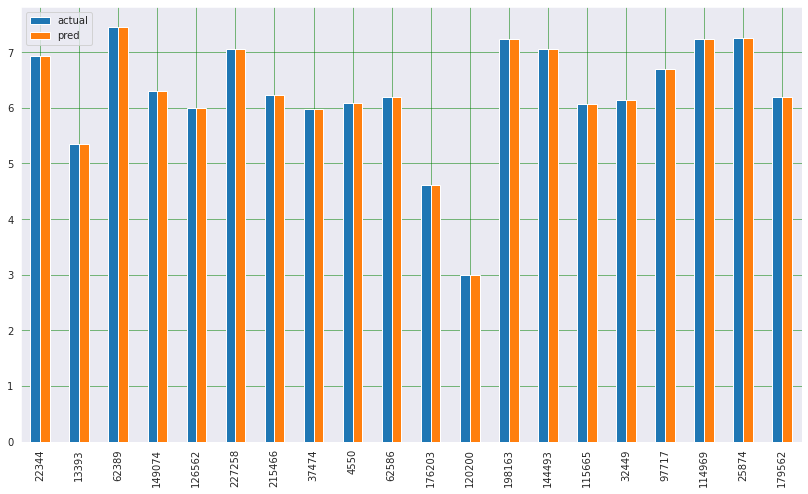

In [ ]:
predictions_ridge.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')


The above plot is a bar plot that shows the actual and compared vales for each of the observations.Bar charts should be used when you are showing segments of information.Vertical bar charts are useful to compare different categorical or discrete variables, such as age groups, classes etc.

In [ ]:
#Implementing the Lasso algorithm
#Creating a Lasso Model
L1 = Lasso(alpha = 0.1)

In [ ]:
#fitting the model
L1.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
#Making predictions for  the train and test data
y_pred_lasso = L1.predict(X_test)
y_pred_lasso_train=L1.predict(X_train)

In [ ]:
lasso_score=L1.score(X_train, y_train)
print("Score for Lasso regression:" , lasso_score)

Score for Lasso regression: 0.7770114147418559


In [ ]:
predictions_lasso=pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

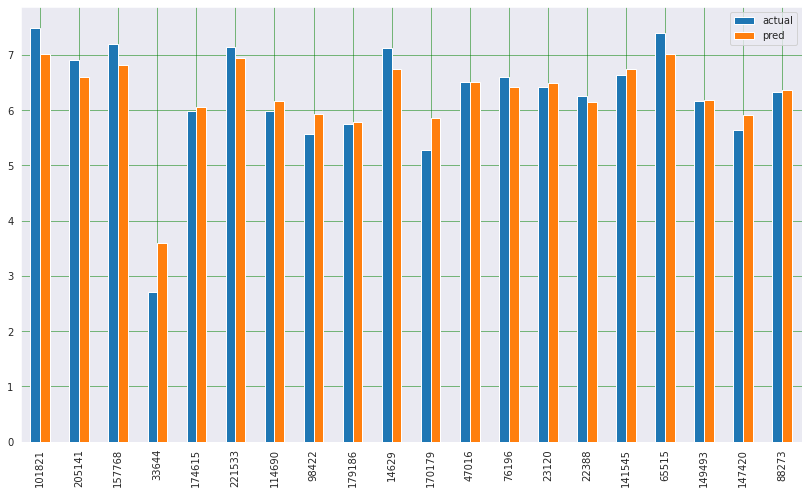

In [ ]:
predictions_lasso.sample(20).plot(kind="bar" , figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')

The above plot is a bar plot that shows the actual and compared vales for each of the observations.Bar charts should be used when you are showing segments of information.Vertical bar charts are useful to compare different categorical or discrete variables, such as age groups, classes etc.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Calculating the R2 value for the Ridge regression algorithm
r2_ridge_train=r2_score(10**(y_train) ,10**(y_pred_ridge_train))
print("R2 for train data set :" , r2_ridge_train)
r2_ridge=r2_score(10**(y_test) ,10**(y_pred_ridge))
print("R2 for test data set:" , r2_ridge)

R2 for train data set : 0.9999999999978126
R2 for test data set: 0.9999999999978312


In [ ]:
#Calculating the MSE and RMSE for Ridge
MSE  = mean_squared_error(10**(y_test),10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 105.31193691430207
RMSE : 10.26216044087706


In [ ]:
#Calculating Adjusted R2 for Ridge
adjusted_R2=1-(1-r2_ridge)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 for Ridge:" , adjusted_R2)

Adjusted R2 for Ridge: 0.9999999999978311


In [ ]:
#Calculating the R2 value for the Lasso regression algorithm
r2_lasso_train=r2_score(y_train , y_pred_lasso_train)
print("R2 for train data set :" , r2_lasso_train)
r2_lasso=r2_score(y_test , y_pred_lasso)
print("R2 for test data set:" , r2_lasso)

R2 for train data set : 0.7770114147418559
R2 for test data set: 0.7772229942735127


In [ ]:
#Calculating the MSE and RMSE for Lasso
MSE  = mean_squared_error(10**(y_test),10**( y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 29341384318141.273
RMSE : 5416768.807891035


In [ ]:
#Calculating Adjusted R2 for Lasso
adjusted_R2_lasso=1-(1-r2_lasso)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 for Lasso:" , adjusted_R2_lasso)

Adjusted R2 for Ridge: 0.7772152560388242


Ridge and lasso regression are two common machine learning approaches for constraining model parameters. Both methods try to get the coefficient estimates as close to zero as possible because minimizing (or shrinking) coefficients can reduce variance dramatically (i.e., overfitting)

For Ridge algorithm I have got :

R2 as 0.999 for train data.For test data also the R2 value is found to be 0.99

Adjusted R2 for test data is found to be:0.999

MSE (Mean Squared Error) is found to be:105.321

RMSE(Root Mean Squared Error) is found to be:10.26

For Lasso regression:

For Lasso regression the R2 value is found to be the same for the train data and test data , which is 0.777.

The Adjusted R2 value is found to be also 0.777


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#Cross validation and yperparameter tuning for Ridge regression.
ridge_cv=Ridge()
parameter= {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge_cv, param_grid=parameter, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -6.832967331142923e-28


In [ ]:
y_pred_ridge_cv = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge_cv))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge_cv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 7.65789816339725e-13
RMSE : 8.750941756975217e-07
R2 : 1.0
Adjusted R2 :  1.0


In [ ]:
### Cross validation for Lasso algorithm
lasso_cv= Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso_cv, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -6.334449879093843e-11


In [ ]:
y_pred_lasso_cv = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso_cv))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso_cv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 48948.92212178094
RMSE : 221.24403296310828
R2 : 0.9999999989919218
Adjusted R2 :  0.9999999989918869


##### Which hyperparameter optimization technique have you used and why?

Our main aim is  to discover the best hyperparameters values to get the perfect prediction results from our model.  But the challenge is, how to find these best sets of hyperparameters? If we try the Manual Search method,by hit and trial process,It would take huge amount of time to build one single model and may also require huge human resource.

For this reason, methods like Random Search, GridSearch were introduced.
Grid searching is a method to find the best possible combination of hyper-parameters at which the model achieves the highest accuracy. Before applying Grid Search on any algorithm, data is divided into train and test data set . GridSearchCV  uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

For Ridge algorithm , the MSE has become  7.65 ,the RMSE value has become 
8.75.The R2 value  has reached 100% and Adjusted R2 value has reached 100%.Before applying the Grid Search Cv technique the RMSE and MSE values were very high and now it has drastically reduced and also achieving 100%R2 qnd AdjustedR2.

For Lasso algorithm ,  
The  MSE value has become: 48948.92 and RMSE value has become : 221.2440
Compared to the model before applying hyperparameter technique , the MSE and RMSE value has drastically reduced.
The R2 value has reached 100% and Adjusted R2 value has reached 100%.
Before applying the hyperparameter optimization technique , the R2 and Adjusted R2 value was 77%.


Hence, by using the hyper parameter optimization , we have seen much improvement in the model.

### ML MODEL -3- :Implementing Random Forest Regressor

In [ ]:
#Create an instance of Random Forest
random_forest=RandomForestRegressor()


In [ ]:
#Fit the model
random_forest.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
#Predict the model
y_pred_rf=random_forest.predict(X_test)

In [ ]:
predictions_rf=pd.DataFrame(zip(y_test, y_pred_rf), columns = ['actual', 'pred'])

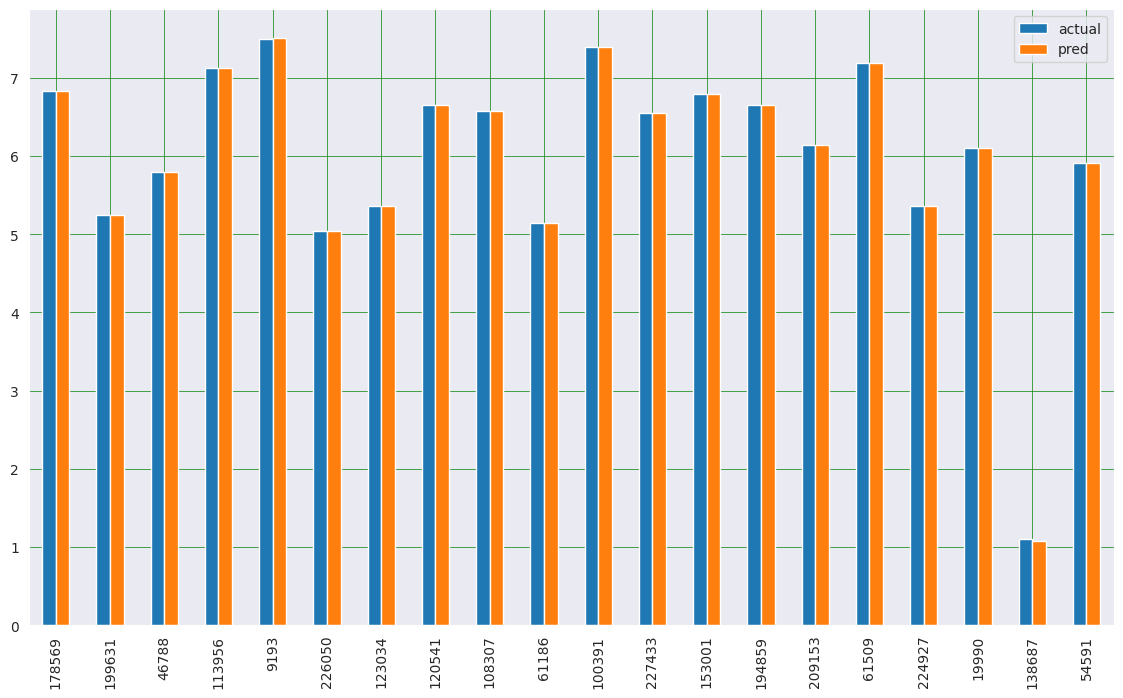

In [ ]:
predictions_rf.sample(20).plot(kind="bar" , figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')

The above plot is a bar plot that shows the actual and compared values for each of the observations.Bar charts should be used when we are showing segments of information.Vertical bar charts are useful to compare different categorical or discrete variables, such as age groups, classes etc.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Calculating the MSE
rf_MSE=mean_squared_error(10**(y_test) ,10**( y_pred_rf))
print("MSE of Random Forest model :" , rf_MSE)

MSE of Random Forest model : 7613367124.792181


In [ ]:
#Calculating the RMSE
rf_RMSE=np.sqrt(rf_MSE)
print("RMSE of Random Forest Model :" , rf_RMSE)

RMSE of Random Forest Model : 87254.61090849114


In [ ]:
#Calculate the R2 value:
RF_r2=r2_score(y_test , y_pred_rf)
print("R2 value for Random Forest Model:" , RF_r2 )

R2 value for Random Forest Model: 0.999915302473547


Now, I have used the Random Forest algorithm to create the model.I also good result in this.Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.I also got good result in this algorithm.

I have got the MSE as:4.163688743600329e-05 which is pretty less.
Also I have got RMSE value as:almost zero.

Also the R2 value is found to be 0.999

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Hyper parameter tuning of Random Forest regressor.
# Number of trees
n_estimators = [80,100]

# Maximum depth of trees
max_depth = [4,6]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

In [ ]:
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestRegressor
rf_model_cv = RandomForestRegressor()

# Grid search
rf_gridsearch = GridSearchCV(estimator=rf_model_cv,
                       param_grid = param_dict,
                       cv = 2,verbose=2 ,  scoring='neg_mean_squared_error')


In [ ]:
rf_gridsearch.fit(X_train , y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  49.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  51.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time= 1.3min
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time= 1.0min
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=  57.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=  49.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time= 1.1min
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time= 1.0min
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=  50.3s
[CV] END max_depth=4, 

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100],
                         'n_estimators': [80, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
rf_gridsearch.best_estimator_

RandomForestRegressor(max_depth=6, min_samples_leaf=50, min_samples_split=50,
                      n_estimators=80)

In [ ]:
rf_optimal_model = rf_gridsearch.best_estimator_

In [ ]:
rf_gridsearch.best_params_

{'max_depth': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 80}

In [ ]:
# Making predictions on train and test data. 
ytrain_rfgrid=rf_optimal_model.predict(X_train)
ytest_rfgrid=rf_optimal_model.predict(X_test)

In [ ]:
rf_gridsearch.fit(X_train , y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  49.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  51.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time= 1.3min
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time= 1.0min
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=  57.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=  49.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time= 1.1min
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time= 1.0min
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=  50.3s
[CV] END max_depth=4, 

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100],
                         'n_estimators': [80, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
rf_gridsearch.best_estimator_

RandomForestRegressor(max_depth=6, min_samples_leaf=50, min_samples_split=50,
                      n_estimators=80)

In [ ]:
rf_optimal_model = rf_gridsearch.best_estimator_

In [ ]:
rf_gridsearch.best_params_

{'max_depth': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 80}

In [ ]:
# Making predictions on train and test data. 
ytrain_rfgrid=rf_optimal_model.predict(X_train)
ytest_rfgrid=rf_optimal_model.predict(X_test)

In [ ]:
#Calculating the MSE value for test data
rfgrid_MSE=mean_squared_error(y_test , ytest_rfgrid)
print("MSE value:" , rfgrid_MSE)

MSE value: 0.023642167727083687


In [ ]:
#Calculating the RMSE value
rfgrid_RMSE=np.sqrt(rfgrid_MSE)
print("RMSE value:" , rfgrid_RMSE)

RMSE value: 0.15376009796785278


In [ ]:
#Calculate the R2 value:
RFgrid_r2=r2_score(y_test , ytest_rfgrid)
print("R2 value:" , RFgrid_r2 )

R2 value: 0.9489563935386118


In [ ]:
#Calculating the Adjusted R2
adjusted_R2rfgrid=1-(1-RFgrid_r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2:" , adjusted_R2xgbgrid)


Adjusted R2: 0.9998122083775979


##### Which hyperparameter optimization technique have you used and why?

Our main aim is  to discover the best hyperparameters values to get the perfect prediction results from our model.  But the challenge is, how to find these best sets of hyperparameters? If we try the Manual Search method,by hit and trial process,It would take huge amount of time to build one single model and may also require huge human resource.

For this reason, methods like Random Search, GridSearch were introduced.
Grid searching is a method to find the best possible combination of hyper-parameters at which the model achieves the highest accuracy. Before applying Grid Search on any algorithm, data is divided into train and test data set . GridSearchCV  uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

 **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**.

After applying the cross validation and hyperparameter tuning technique ,the MSE value is almost zero and RMSE value is found to be 0.15.The R2 value has become 0.94 however Adjusted R2 has reached almost 100%.

### ML Model - 4 - **Implementing XgBoost Regressor**

In [ ]:
# ML Model - 4 - Implementation of XGBoost Regressor
# Create an instance of the XGBoost Regressor
xgb_model = XGBRegressor()

# Fit the Algorithm
xgb_model=xgb_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

ytrain_xgb_pred = xgb_model.predict(X_train)
ytest_xgb_pred = xgb_model.predict(X_test)

[09:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
predictions_xgb=pd.DataFrame(zip(y_test , ytest_xgb_pred) , columns=['actual' , 'predicted'] )
predictions_xgb

,actual,predicted
0,5.872118,5.856761
1,6.973543,6.973396
2,6.413459,6.452928
3,5.950643,5.968597
4,6.817831,6.787962
...,...,...
230317,6.122493,6.147381
230318,6.906755,6.949448
230319,5.529429,5.489201
230320,6.475433,6.538578


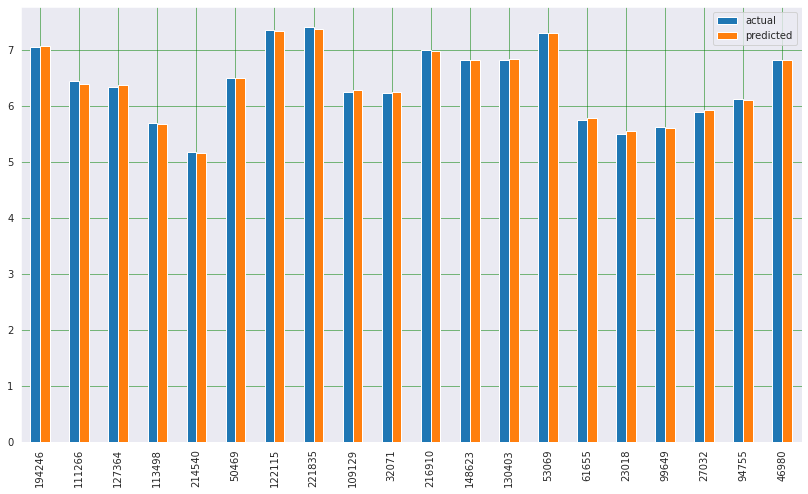

In [ ]:
predictions_xgb.sample(20).plot(kind="bar" , figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')

The above plot is a bar plot that shows the actual and compared values for each of the observations.Bar charts should be used when we are showing segments of information.Vertical bar charts are useful to compare different categorical or discrete variables, such as age groups, classes etc.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Calculating the MSE
xgb_MSE=mean_squared_error(10**(y_test) ,10**( ytest_xgb_pred))
print("MSE of Random Forest model :" , xgb_MSE)

MSE of Random Forest model : 1457789796221.8586


In [ ]:
#Calculating the RMSE
xgb_RMSE=np.sqrt(xgb_MSE)
print("RMSE of XGB model :" , xgb_RMSE)

RMSE of XGB model : 1207389.662131434


In [ ]:
#Calculating the R2
xgb_R2=r2_score(y_test , ytest_xgb_pred)
print("R2 for the XGB  model:" , xgb_R2)

R2 for the XGB  model: 0.9968030081538223


In [ ]:
#Calculating the Adjusted R2
adjusted_R2=1-(1-xgb_R2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2:" , adjusted_R2)

Adjusted R2: 0.9968028971052285


Now I have implemented the another algorithm called as  XGBoost Regressor algorithm.XGBoost stands for "Extreme Gradient Boosting" and it is an implementation of gradient boosting trees algorithm. The XGBoost is a popular supervised machine learning model with characteristics like computation speed, parallelization, and performance.

By implementing this algorithnm , I have got MSE as  1457789796221.8 and    RMSE as 1207389.66   

I have got R2 as 99.6%   and Adjusted R2 as : 99.6% 

Now I will experiment by tuning hyperparameters and check the results:

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [80,100]

# Maximum depth of trees
max_depth = [6,8]

# Minimum number of samples required to split a node
min_samples_split = [100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xgb_model_cv = XGBRegressor()

# Fit the Algorithm
# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model_cv,
                       param_grid = param_dict,
                       cv = 3 , scoring='neg_mean_squared_error')

xgb_grid=xgb_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

#ytrainxgb_preds = xgb_grid.predict(X_train)
#ytestxgb_preds = xgb_grid.predict(X_test)

[10:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:14:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:15:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:17:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:17:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
print("Best: %f using %s" % (xgb_grid.best_score_, xgb_grid.best_params_))

Best: -0.000206 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 100, 'n_estimators': 100}


In [ ]:
xgb_optimalmodel=xgb_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

ytrain_xgbgrid_pred = xgb_optimalmodel.predict(X_train)
ytest_xgbgrid_pred = xgb_optimalmodel.predict(X_test)

In [ ]:
#Calculating the MSE
xgbgrid_MSE=mean_squared_error(10**(y_test) ,10**( ytest_xgbgrid_pred))
print("MSE of XGB grid model :" , xgbgrid_MSE)

MSE of Random Forest model : 45739185351.83238


In [ ]:
#Calculating the RMSE
xgbgrid_RMSE=np.sqrt(xgbgrid_MSE)
print("RMSE of XGB model :" , xgbgrid_RMSE)

RMSE of XGB model : 213867.2142985745


In [ ]:
#Calculate the R2 value:
r2_xgbgrid=r2_score(y_test , ytest_xgbgrid_pred)
print("R2 value:" , r2_xgbgrid )

R2 value: 0.9996379721766602


In [ ]:
#Calculating the Adjusted R2
adjusted_R2xgbgrid=1-(1-r2_xgbgrid)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2:" , adjusted_R2xgbgrid)


Adjusted R2: 0.9996379596015013


### **Which hyperparameter optimization technique have you used and why?**

Our main aim is  to discover the best hyperparameters values to get the perfect prediction results from our model.  But the challenge is, how to find these best sets of hyperparameters? If we try the Manual Search method,by hit and trial process,It would take huge amount of time to build one single model and may also require huge human resource.

For this reason, methods like Random Search, GridSearch were introduced.
Grid searching is a method to find the best possible combination of hyper-parameters at which the model achieves the highest accuracy. Before applying Grid Search on any algorithm, data is divided into train and test data set . GridSearchCV  uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

After using the hyperparameter tuning techinques , the MSE values and RMSE values have reduced significantly.The new MSE value is : 45739185351.83238  and the new RMSE value is : 213867.2

Also, the new R2 has become 99.9% and also new Adjusted R2 also has become 99.99% from 99.6% 

**1. Which Evaluation metrics did you consider for a positive business impact and why?**

I would like to go with R2 and Adjusted R2.

R Square measures how much variability in dependent variable can be explained by the model.R Square is calculated by the sum of squared of prediction error divided by the total sum of the square which replaces the calculated prediction with mean. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.Hence I would like to give more importance to Adjusted R2 than R2 

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the above code I would like to choose Linear Regression algorithm for model prediction.As a taxi vendor or taxi service provider , time will be the most important factor.The allotment of cabs has to be done at a very fast rate.Hence it becomes very important to get quick results from the model.From Linear regression model I could acheive  100% R2 and 100% adjusted R2 rapidly without using any Hyper parameter tuning technique thus simplyfing the complexity.Hence I would like to choose Linear Regression model for prediction.

# **Conclusion**

Below are some conclusions driven from the above project.

*   The maximum cabs were booked on "Friday" represented as day-4

*   The highest duration of trip was on "Thursday" reprsented as day-3

*   The highest duration was done by cutomers whose booking id was 'id0053347'.
    It is found out that the trip duration for this trip is 979.52 hours.

*   The highest distance was travelled by the customers whose booking id is
    found to be 'id2306955'.The distance travelled is approximately  1240.91

*   We can see from the  data analysis that the count of customer      
    travelling within 30 mins is really very large which is around '1345526'   

*   From the above analysis it is inferred that the number of customers who 
    travelbetween 30 mins to 1 hour is 100801.It is pretty less compared to   
    number of customer who travel within 30 mins.

*   We can see that the number of customers who travel between 1 hour to 2hour 
    is 10064.It has become less when compared to the number of customer 
    travelling within 30 mins and number of customer travelling between 30 mins
    to 1 hour

*   From the above analysis we can see that the number of customers having  
    travel time of above 2 hours is 2253 which is very less compared to the  
    number of customers travelling within 2hrs.

*   There are two vendors who are providing cab services which are 'Vendor_id1'
    and 'Vendor_id2'.From the countplot it is evident that  'Vendor_id2' has 
    more number of customers than Vendor_id1'


*   The number of people travelling is maximum at 6:00 PM in the evening.From 
    early morning 1:00 AM till 5 AM the number of people travelling is very 
    minimal.The number of people travelling increases linearly from 5 AM untill 

*   After data wrangling , and da
*   List item

10 AM.After 10 AM till 3 PM there is a very few increase in the number of passengers.It dips at 4.00PM however reaches its peak at 6.00 pm.After 6.00 PM in the evening the number of passengers travelling decreases significantly.
















